# Setup and Imports

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import deeptime as dpt
%matplotlib qt   
# doesn't work on my laptop

from tistools import read_inputfile, get_LMR_interfaces, read_pathensemble, get_weights
# from tistools import set_tau_distrib, set_tau_first_hit_M_distrib, cross_dist_distr, pathlength_distr
from tistools import ACCFLAGS, REJFLAGS

from tistools import get_lmr_masks, get_generation_mask, get_flag_mask, select_with_masks
from tistools import unwrap_by_weight, running_avg_local_probs, get_local_probs, get_global_probs_from_dict, get_global_probs_from_local
from tistools import make_plot_trajs

from pprint import pprint    # to print the vars of the pathensemble object

# TODO: change to istar_analysis when finished
# from istar_test import *
from tistools import istar_pathlengths
from tistools import global_pcross_msm_star, construct_M_istar, get_transition_probs_weights, get_transition_probs_interm, get_simple_probs, get_summed_probs
from tistools import get_weights_staple, compute_weight_matrices, compute_weight_matrix, plot_rv_star, plot_rv_repptis, plot_rv_comp
from tistools import display_data, memory_analysis, ploc_memory, plot_memory_analysis, pcca_analysis, cprobs_repptis_istar, ploc_repptis_from_staples, generate_state_labels, visualize_turn_based_analysis, analyze_memory_vs_free_energy_effects, analyze_momentum_vs_free_energy


%matplotlib qt

inotify_add_watch(/home/elias/.config/ibus/bus/05a6c2178573356a657e0cd165380748-unix-1) failed: (No space left on device)


In [2]:
import logging

logger = logging.getLogger(__name__)

In [3]:
%autoreload 2   
# something with pip install -e .

# Reading

In [4]:
# zero_minus_one = True if lambda_-1 interface is set
# zero_minus_one = False if lambda_-1 interface is not set

# data the maze
# ---------------
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/APPTIS/infretis/examples/ase/staple_flat_walls_ase/"

# indir = indir = "/run/user/1001/gvfs/smb-share:server=files.ugent.be,share=eliawils,user=eliawils/shares/tw06_biommeda_pastime1/11.2024_StapleTIS/simulations/flat/sim_istar0br2108/"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar2cosbr_2108/"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istarz_g5/"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istarz_slopeg5_2702/"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0t/"

# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istarwell2_2108/"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istarwell250k_0506/"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istarwell0_0209/"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istarwell050k_1606/"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istarwell2_br/"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istarwell0_add_0502/"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istarwell0add50k_1606/"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istarwell0_add_br2305/"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br10intf035/"
indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br6dintf/"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br15dintf/"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0lgv15intf/"
# indir = "/mnt/tw06_biommeda_pastime1/11.2024_StapleTIS/simulations/maze2D/sim_istarmaze_kick2708/"
# indir = "/mnt/tw06_biommeda_pastime1/11.2024_StapleTIS/simulations/maze2D/sim_/"
zero_minus_one = False
inputfile = indir + "logging.log"
# inputfile = indir + "fakeretis.rst"


import os
import glob
os.chdir(indir)
print(os.getcwd())

folders = glob.glob(indir + "/0[0-9][0-9]")
folders = sorted(folders)
print(folders)

/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108
['/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/000', '/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/001', '/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/002', '/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/003', '/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/004']


In [5]:
# !!! last lines !!!  allow to speed up this notebook
# pe.set_orders(load=False...)  -> 1st time you run the code, this will store npy files
# pe.set_orders(load=True...)  -> next time you run the code, you can read npy files

# Reading all input
#===================
interfaces, zero_left, timestep = read_inputfile(inputfile)
LMR_interfaces, LMR_strings = get_LMR_interfaces(interfaces, zero_left)
pathensembles = []
for i,fol in enumerate(folders):
    print("#"*80)
    print(fol)
    pe = read_pathensemble(fol+"/pathensemble.txt")
    pe.set_name(fol)
    pe.set_interfaces([LMR_interfaces[i], LMR_strings[i]])
    if i==0:
        pe.set_zero_minus_one(zero_minus_one)   # TODO this is never used
        pe.set_in_zero_minus(True)
    if i==1:
        pe.set_in_zero_plus(True)
    w, _ = get_weights(pe.flags, ACCFLAGS, REJFLAGS, verbose = False)
    pe.set_weights(w)
    print("pathensemble info: ")
    pprint(vars(pe))
    pathensembles.append(pe)
    # read order parameters order.txt/order.npy into path ensemble object
    #pe.set_orders(load=False, acc_only=True, save=False) # if saving doesn't work
    #### CHANGE HERE ####
    # pe.set_orders(load=False, acc_only=True, save=True) # for the 1st time
    pe.set_orders(load=True, acc_only=True) # for the next times, save=True/False is not important

################################################################################
/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/000
['5', '3', '2', 'R', 'M', 'R', '17', 'ACC', 'sh', '-1.402889051e-01', '-8.936686862e-02', '5', '16', '0.000000000e+00', '0', '1', '1.000000000e+00']
[1. 1. 1. ... 1. 1. 1.]
pathensemble info: 
{'cyclenumbers': array([     0,      1,      2, ..., 199998, 199999, 200000]),
 'dirs': array([-1., -1.,  1., ..., -1., -1., -1.]),
 'flags': array(['ACC', 'BTL', 'ACC', ..., 'ACC', 'BTL', 'FTL'], dtype='<U3'),
 'generation': array(['ld', 'sh', 'sh', ..., 'sh', 'sh', 'sh'], dtype='<U2'),
 'has_zero_minus_one': False,
 'in_zero_minus': True,
 'in_zero_plus': False,
 'interfaces': [[-0.1, -0.1, -0.1], ['l_[0]', 'l_[0]', 'l_[0]']],
 'istar_idx': array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]]),
 'lambmaxs': array([-0.09399192, -0.09489936, -0.08546586, ..., -0.08216926,
  

In [6]:
for pe in pathensembles:
    print(f"ensemble {pathensembles.index(pe)}")
    print(max(pe.lengths))

for i in range(len(pathensembles)):
    accmask = get_flag_mask(pathensembles[i], "ACC")
    loadmask = get_generation_mask(pathensembles[i], "ld")
    mask = get_lmr_masks(pathensembles[i])
    print(i, np.average(select_with_masks(pathensembles[i].lengths, [~loadmask, accmask])))
    print("LMRlen", i, np.average(select_with_masks(pathensembles[i].lengths, [~loadmask, accmask])))

ensemble 0
5568
ensemble 1
1675
ensemble 2
1936
ensemble 3
2432
ensemble 4
1898
0 113.82607557052002
LMRlen 0 113.82607557052002
1 81.96296586282493
LMRlen 1 81.96296586282493
2 384.52430947990405
LMRlen 2 384.52430947990405
3 430.61899068116685
LMRlen 3 430.61899068116685
4 383.50607032830817
LMRlen 4 383.50607032830817


# P_cross Calculations

This section computes crossing probabilities using REPPTIS, iSTAR, and MSM approaches.

## REPPTIS and iSTAR P_cross

In [7]:
# plocrepptis, plocistar = cprobs_repptis_istar(pathensembles, interfaces, len(interfaces))
plocrepptis, plocistar = cprobs_repptis_istar(pathensembles, interfaces, len(interfaces))

None ha_factors for 0th ensemble
None
weights:
accepted      80191
rejected      119810
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 0:  0.0
None ha_factors for 1th ensemble
None
weights:
accepted      76633
rejected      123368
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 1:  199995.0
None ha_factors for 2th ensemble
None
weights:
accepted      100867
rejected      99134
omitted       0
total trajs   200001
total weights 243871
Sum weights ensemble 2:  292856.0
None ha_factors for 3th ensemble
None
weights:
accepted      105379
rejected      94622
omitted       0
total trajs   200001
total weights 288062
Sum weights ensemble 3:  288059.0
None ha_factors for 4th ensemble
None
weights:
accepted      109715
rejected      90286
omitted       0
total trajs   200001
total weights 239957
Sum weights ensemble 4:  287044.0



Ensemble 0 ([0-]):
weights:
accepted      100867
rejected      99134
omitted       0
total trajs   200

In [8]:
C, X_tr, X_norm, wpath, X, W_tr, W_norm, W_tr_norm, W = display_data(pathensembles, interfaces, len(interfaces), correct_ha=False)
p, q = get_transition_probs_weights(wpath)

----------
ENSEMBLE [0-] | ID 0
----------
None ha_factors for 0th ensemble
None
weights:
accepted      80191
rejected      119810
omitted       0
total trajs   200001
total weights 200001
None ha_factors for 0th ensemble
None
Sum weights ensemble 0: 0.0000
None ha_factors for 0th ensemble
None
Sum weights ensemble 0: 0.0000
None ha_factors for 0th ensemble
None
Sum weights ensemble 0: 0.0000

1a. Raw data: unweighted C matrices
C[0] = 
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

1b. Raw data: unweighted path counts with new MD steps
C_md[0] = 
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

2. Weighted data: including high acceptance weights
X[0] = 
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Sum weights ensemble 0: 0.0000

2b. Normalized weighted data
X_norm[0] = 
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0

In [9]:
ploc_repptis, ploc_istar = ploc_repptis_from_staples(pathensembles, interfaces, len(interfaces)) 
ploctest = [{} for _ in ploc_istar.keys()]
for i in list(ploc_istar.keys())[1:]:
    ploctest[i]["LMR"] = ploc_istar[i]["LMRtot"][0]
    ploctest[i]["LML"] = ploc_istar[i]["LMLtot"][0]
    ploctest[i]["RMR"] = ploc_istar[i]["RMRtot"][0]
    ploctest[i]["RML"] = ploc_istar[i]["RMLtot"][0]

print('istar', get_global_probs_from_dict(ploctest)[-1])

ploctest2 = [{} for _ in ploc_repptis.keys()]
for i in list(ploc_repptis.keys())[1:]:
    ploctest2[i]["LMR"] = ploc_repptis[i]["LMR"]
    ploctest2[i]["LML"] = ploc_repptis[i]["LML"]
    ploctest2[i]["RMR"] = ploc_repptis[i]["RMR"]
    ploctest2[i]["RML"] = ploc_repptis[i]["RML"]
print('repptis', get_global_probs_from_dict(ploctest2)[-1])

None ha_factors for 0th ensemble
None
weights:
accepted      80191
rejected      119810
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 0:  0.0
None ha_factors for 1th ensemble
None
weights:
accepted      76633
rejected      123368
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 1:  199995.0
None ha_factors for 2th ensemble
None
None
weights:
accepted      80191
rejected      119810
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 0:  0.0
None ha_factors for 1th ensemble
None
weights:
accepted      76633
rejected      123368
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 1:  199995.0
None ha_factors for 2th ensemble
None
weights:
accepted      100867
rejected      99134
omitted       0
total trajs   200001
total weights 243871
Sum weights ensemble 2:  292856.0
weights:
accepted      100867
rejected      99134
omitted       0
total trajs   200001
total weights 2438

In [10]:
# Analyze the [i*] simulation.
# Analysis output is saved to the data dictionary.
data = {}

data["running"] = {}

# analysis using all data: ["full"]
# data["full"] = get_transition_probs(pathensembles, interfaces)
# pprint(data)
# print("\n\n")
# data["full"] = get_transition_probzz2(pathensembles, interfaces)
w = compute_weight_matrices(pathensembles, interfaces, tr=False)
for i in range(len(pathensembles)):
    print(f"sum weights pe {i}: ",np.sum(w[i]))

data["full"], _ = get_transition_probs_weights(w)
# data["full"] = get_transition_probs(w)
data["full1"] = get_simple_probs(w)
# data["full"] = get_summed_probs(pathensembles, interfaces)
pprint(data)

None ha_factors for 0th ensemble
None
weights:
accepted      80191
rejected      119810
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 0:  0.0
None ha_factors for 1th ensemble
None
weights:
accepted      76633
rejected      123368
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 1:  199995.0
None ha_factors for 2th ensemble
None
weights:
accepted      80191
rejected      119810
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 0:  0.0
None ha_factors for 1th ensemble
None
weights:
accepted      76633
rejected      123368
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 1:  199995.0
None ha_factors for 2th ensemble
None
weights:
accepted      100867
rejected      99134
omitted       0
total trajs   200001
total weights 243871
weights:
accepted      100867
rejected      99134
omitted       0
total trajs   200001
total weights 243871
Sum weights ensemble 2:  292856.0
No

# Now work with MSM

In [11]:
from tistools import construct_M
from tistools import global_pcross_msm
from tistools import mfpt_to_first_last_staple

from tistools import create_labels_states

In [12]:
def print_vector(g, states=None):
    if states is None:
        for i in range(len(g)):
            print("state", i, g[i])
    else:
        for i in range(len(g)):
            print("state", states[i], g[i][0])

In [13]:
print(interfaces)
N = len(interfaces)
assert N >= 3
NS = 2*N
print("N", N)
print("NS", NS)

#labels2 = ["0+- LML","0+- LMR","0+- RML","1+- LML","1+- LMR",
#           "1+- RML", "1+- RMR", "2+- LML", "2+- LMR",
#           "2+- RML", "2+- RMR", "3+- LML", "3+- LMR",]
labels1, labels2 = create_labels_states(N)
print(labels1, labels2)

[-0.1, 0.0, 0.1, 0.2, 0.3]
N 5
NS 10
['0-     ', 'B      '] ['0+- LML', '0+- LMR', '0+- RML', '1+- LML', '1+- LMR', '1+- RML', '1+- RMR', '2+- LML', '2+- LMR', '2+- RML', '2+- RMR', '3+- LML', '3+- LMR']


In [14]:
p_ini = data["full"]
print("p matrix: ", p_ini)
p_ini[-2][-1] = 1
print("sum rows of p:")
for i in range(p_ini.shape[0]):
    print(np.sum(p_ini[i][:i]), np.sum(p_ini[i][i:]))
M_valid = construct_M_istar(p_ini, NS, N)
M1 = construct_M_istar(data["full1"], NS, N)

# for r in range(M.shape[0]):
#     if np.sum(M[r]) != 0:
#         M[r] /= np.sum(M[r])
#Local crossing probabilities:
#pRMR = 0.34205627942625644.  #ppps
#pRML = 0.6579437205737436.   #ppms
#pLMR = 0.25316455696202533.  #pmps
#pLML = 0.7468354430379747.   #pmms

p matrix:  [[0.90819146 0.04486071 0.02206539 0.01169109 0.01319135]
 [1.         0.         0.45137623 0.26126961 0.28735416]
 [0.50463867 0.49536133 0.         0.46733181 0.53266819]
 [0.28075044 0.25273065 0.46651891 0.         1.        ]
 [0.14661926 0.13122919 0.24888154 0.47327001 0.        ]]
sum rows of p:
0.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0


In [15]:
print("M")
print("shape", M_valid.shape)
print("sum prob in rows", np.sum(M_valid,axis=1))
print(M_valid)
print(M1)
# row 8, 10, 12, 14. # counting starts from 0   not okay!!!!

M
shape (10, 10)
sum prob in rows [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.90819146 0.         0.         0.         0.
  0.04486071 0.02206539 0.01169109 0.01319135]
 [0.         0.         0.         0.         0.         0.
  0.         0.45137623 0.26126961 0.28735416]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.46733181 0.53266819]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.50463867 0.         0.49536133 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.28075044 0.         0.25273065 0.46651891 0.
  0.         0.   

# Look at this Markov model

In [16]:
#import numpy.linalg
vals, vecs = np.linalg.eig(M_valid)
print(vals)
vals, vecs = np.linalg.eig(M_valid.T)
print(vals)

[ 0.00000000e+00+0.j         -4.66158077e-01+0.84250079j
 -4.66158077e-01-0.84250079j  1.00000000e+00+0.j
 -6.15303729e-01+0.j          5.99633104e-01+0.j
  3.58964666e-01+0.j         -3.61744321e-01+0.j
 -3.80065403e-17+0.j         -4.92335655e-02+0.j        ]
[-4.66158077e-01+0.84250079j -4.66158077e-01-0.84250079j
  1.00000000e+00+0.j         -6.15303729e-01+0.j
  5.99633104e-01+0.j          3.58964666e-01+0.j
 -3.61744321e-01+0.j         -4.92335655e-02+0.j
  6.39246292e-18+0.j          0.00000000e+00+0.j        ]


In [17]:
print("what if chain propagates")
print("A[0,:]")
# check stationary behavior
A = M_valid
for n in range(10):
    A = np.dot(A,M_valid)
    #print(A)
    print(A[0,:])
    print(np.sum(A[0,:]))  # is 1 indeed

what if chain propagates
A[0,:]
[0.         0.90819146 0.         0.         0.         0.
 0.04486071 0.02206539 0.01169109 0.01319135]
1.0
[0.92138281 0.05927804 0.         0.01388504 0.00545411 0.
 0.         0.         0.         0.        ]
0.9999999999999999
[0.05927804 0.         0.92138281 0.         0.         0.
 0.         0.00626737 0.00617662 0.00689516]
0.9999999999999999
[0.00689516 0.84168885 0.05927804 0.00466564 0.00288151 0.
 0.04133389 0.02033067 0.01077197 0.01215428]
1.0
[0.85384313 0.10845358 0.00689516 0.01279343 0.00502533 0.
 0.00265926 0.00341395 0.00325863 0.00365754]
1.0
[1.12111111e-01 1.15590513e-02 8.53843132e-01 2.51469577e-03
 1.52021479e-03 0.00000000e+00 3.09321619e-04 5.92679579e-03
 5.77164246e-03 6.44403455e-03]
1.0
[0.01800309 0.78037364 0.11211111 0.00439458 0.00269258 0.
 0.03830401 0.01997545 0.01134982 0.01279572]
1.0
[0.79316937 0.15338922 0.01800309 0.01276351 0.0052949  0.
 0.00502938 0.00445738 0.0037172  0.00417595]
0.9999999999999999
[0

# Pcross with MSM

In [18]:
# global crossing prob
z1, z2, y1, y2 = global_pcross_msm_star(M_valid, True)
print("Z")
print_vector(z1, labels1)
print_vector(z2, labels2)
print("Y")
print_vector(y1, labels1)
print_vector(y2, labels2)
print("global crossing prob", y1[0])


=== Eigenvalue Analysis ===
Mp eigenvalues: [ 0.     -0.6157 -0.3586  0.6157  0.3586  0.      0.    ]
(I-Mp) eigenvalues: [1.     0.3843 0.6414 1.6157 1.3586 1.     1.    ]

=== Matrix Components ===
D (transitions from intermediate to boundary states):
[[0.     0.0132]
 [0.     0.2874]
 [0.     0.5327]
 [0.     1.    ]
 [0.     0.    ]
 [0.     0.    ]
 [0.     0.    ]]

E (transitions from boundary to intermediate states):
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]

M11 (transitions between boundary states):
[0. 0.]

=== Solution Vectors ===
z1 (boundary states solution):
[[0]
 [1]]

z2 (intermediate states solution):
[[0.0248]
 [0.5353]
 [0.762 ]
 [1.    ]
 [0.    ]
 [0.2651]
 [0.4908]]

=== Result Vectors ===
y1 (boundary states result):
[[0.0248]
 [0.    ]]

y2 (intermediate states result):
[[0.0248]
 [0.5353]
 [0.762 ]
 [1.    ]
 [0.    ]
 [0.2651]
 [0.4908]]

=== Verification ===
||y2-z2||² = 1.541948e-32
✓ Verification passed: z2 and y2 are identical (as expected)
Z
stat

In [19]:
# P_loc with MSM
plocMSM = np.ones(len(interfaces))
# p2 = [1.0, 0.056804159591634415, 0.032312997136678026, 0.018071661236763906, 0.009174080897093834, 0.004218791762213937, 0.0019851528367788125, 0.0015222409020198072, 0.001318390278132916, 0.0011178599945945473, 0.0009802371708142466]
# p2 = [1.0, 0.8272598636455519, 0.8118884810440299, 0.7938415404869816, 0.5663700466714486, 0.5545303803303038]
# p2 = [1.0, 0.055139270922254895, 0.03126608951116539, 0.017392262443045026, 0.008894249404190929, 0.0040038338896561795, 0.0010513581251145503, 0.0010513581251145503, 0.0010513581251145503, 0.0010513581131851855, 0.0010513580976654149]
# p3 = [1.0, 0.062089, 0.035751653, 0.02010748, 0.010213876, 0.004782699, 0.001383816, 0.000568035, 0.000547059, 0.000516629, 0.000493516]
# p3 = [1.0, 0.810296, 0.796242226, 0.78048937, 0.636988594, 0.625611341]
# p3 = [1.0, 0.059440, 0.575552, 0.565633, 0.517311, 0.461832, 0.259615, 0.368699, 0.992271, 0.999820, 0.987496]
# p3 = [np.prod(p3[:i+1]) for i in range(len(p3))]

for lint in range(2, len(interfaces)+1):
    wi = compute_weight_matrices(pathensembles[:lint], interfaces[:lint], len(interfaces), False)
    pi, _ = get_transition_probs_weights(wi)
    # pi = get_transition_probs(wi)
    # pi = get_simple_probs(wi)
    Mi = construct_M_istar(pi, max(4, 2*len(interfaces[:lint])), len(interfaces[:lint]))
    z1, z2, y1, y2 = global_pcross_msm_star(Mi)
    plocMSM[lint-1] = y1[0][0]
    print(f"ploc till intf {lint-1}: ", y1[0][0])

# Make a figure of the global crossing probabilities
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.plot(plocMSM, "o", c = "r")
ax.errorbar([i for i in range(len(plocMSM))], plocMSM, fmt="-o", c = "b", ecolor="r", capsize=6, label="StapleTIS")
# ax.errorbar([i for i in range(len(plocMSM))], p2, fmt="-o", c = "orange", ecolor="r", capsize=6., label="REPPTIS")
# ax.errorbar([i for i in range(len(plocMSM))], p3, fmt="-o", c = "r", ecolor="r", capsize=6., label="RETIS")
ax.set_xlabel(r"Interface index")
ax.set_ylabel(r"$P_A(\lambda_i|\lambda_A)$")
ax.set_xticks(np.arange(len(interfaces)))
fig.tight_layout()
fig.legend()
fig.show()


None ha_factors for 0th ensemble
None
weights:
accepted      80191
rejected      119810
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 0:  0.0
None ha_factors for 1th ensemble
None
weights:
accepted      76633
rejected      123368
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 1:  199995.0

Intermediate transition probabilities (q matrix):
[[1.     0.0918]
 [1.     0.    ]]

Final transition probabilities (p matrix):
[[0.9082 0.0918]
 [1.     0.    ]]

Local crossing probabilities computed successfully
ploc till intf 1:  0.09180853957030187
None ha_factors for 0th ensemble
None
weights:
accepted      80191
rejected      119810
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 0:  0.0
None ha_factors for 1th ensemble
None
weights:
accepted      76633
rejected      123368
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 1:  199995.0

Intermediate transition probabili

In [20]:
print(plocMSM)
for pp in plocMSM:
    print(pp)
print("\n\n")
pcrosslocMSM = np.empty(len(plocMSM))

for i in range (len(pcrosslocMSM)):
    pcrosslocMSM[i] = plocMSM[i]/np.prod(pcrosslocMSM[:i])
    print(pcrosslocMSM[i])
    

[1.         0.09180854 0.04694783 0.03260604 0.02477961]
1.0
0.09180853957030187
0.046947825359123105
0.03260603607830775
0.024779608937122343



1.0
0.09180853957030187
0.5113666504102603
0.6945164302902392
0.7599699907590977


# Collecting times

In [21]:
# Additional information
#==================================
# Average path lengths per ensemble for each path type
print(indir[-20:])
pathtypes = ("LML", "LMR", "RMR", "RML", "LM*", "*M*", "***", "RM*", "L**", "**R", "R**")

print("=" * 80)
print("AVERAGE PATH LENGTHS BY ENSEMBLE AND PATH TYPE")
print("=" * 80)

for i, pe in enumerate(pathensembles):
    print(f"\nEnsemble {i} ({pe.name}):")
    print("-" * 50)
    
    for ptype in pathtypes:
        mask = (pe.lmrs == ptype)
        if np.any(mask):
            lengths = pe.lengths[mask]
            avg_length = np.mean(lengths)
            count = np.sum(mask)
            print(f"  {ptype:4s}: {avg_length:8.2f} (n={count:4d})")
        else:
            print(f"  {ptype:4s}: {0:8.2f} (n={0:4d})")

ns/sim_istar0br2108/
AVERAGE PATH LENGTHS BY ENSEMBLE AND PATH TYPE

Ensemble 0 (/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/000):
--------------------------------------------------
  LML :     0.00 (n=   0)
  LMR :     0.00 (n=   0)
  RMR :   110.08 (n=83301)
  RML :     0.00 (n=   0)
  LM* :     0.00 (n=   0)
  *M* :    38.47 (n=70756)
  *** :     0.00 (n=   0)
  RM* :    70.23 (n=45944)
  L** :     0.00 (n=   0)
  **R :     0.00 (n=   0)
  R** :     0.00 (n=   0)

Ensemble 1 (/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/001):
--------------------------------------------------
  LML :    16.84 (n=62586)
  LMR :   313.60 (n=12451)
  RMR :    45.84 (n=8798)
  RML :   315.69 (n=11358)
  LM* :    14.10 (n=38212)
  *M* :    10.13 (n=60603)
  *** :    11.35 (n=2111)
  RM* :    57.03 (n=3882)
  L** :     0.00 (n=   0)
  **R :     0.00 (n=   0)
  R** :     0.00 (n=   0)

Ensemble 2 (/mnt/0bf0c339-3

In [22]:
# Import the new path length functions from istar_pathlengths
from tistools import (
    set_taus_staple, 
    collect_tau_staple, collect_tau1_staple, collect_tau2_staple, collect_taum_staple,
    construct_tau_matrix_staple, construct_tau_vector_staple
)

In [23]:
# Compute tau averages for each path ensemble using new (start, end) interface indices
# This sets pe.tau1avg, pe.tau2avg, pe.tauavg as (n_intf+1, n_intf) matrices for each ensemble
tau_avg = set_taus_staple(pathensembles, interfaces)

# Inspect what set_taus_staple computed for each ensemble
print("=" * 80)
print("TAU AVERAGES PER ENSEMBLE (using new interface-pair indexing)")
print("=" * 80)
for i, pe in enumerate(pathensembles):
    print(f"\nEnsemble {i} ({pe.name}):")
    print(f"  pe.tauavg shape: {pe.tauavg.shape if hasattr(pe, 'tauavg') else 'N/A'}")
    print(f"  pe.tau1avg shape: {pe.tau1avg.shape if hasattr(pe, 'tau1avg') else 'N/A'}")
    print(f"  pe.tau2avg shape: {pe.tau2avg.shape if hasattr(pe, 'tau2avg') else 'N/A'}")
    
    # Show non-zero entries
    if hasattr(pe, 'tauavg') and isinstance(pe.tauavg, np.ndarray):
        nonzero = np.argwhere(pe.tauavg > 0)
        for start_idx, end_idx in nonzero[:10]:  # Show up to 10 non-zero entries
            start = start_idx - 1  # Convert back to interface index (shift by 1)
            print(f"    tau[{start:2d},{end_idx:2d}] = {pe.tauavg[start_idx, end_idx]:.1f}")
        if len(nonzero) > 10:
            print(f"    ... and {len(nonzero) - 10} more non-zero entries")

TAU AVERAGES PER ENSEMBLE (using new interface-pair indexing)

Ensemble 0 (/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/000):
  pe.tauavg shape: (6, 5)
  pe.tau1avg shape: (6, 5)
  pe.tau2avg shape: (6, 5)
    tau[-1, 0] = 60.6

Ensemble 1 (/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/001):
  pe.tauavg shape: (6, 5)
  pe.tau1avg shape: (6, 5)
  pe.tau2avg shape: (6, 5)
    tau[ 0, 0] = 9.0
    tau[ 0, 1] = 192.2
    tau[ 0, 2] = 323.4
    tau[ 0, 3] = 455.5
    tau[ 0, 4] = 460.3
    tau[ 1, 0] = 190.9
    tau[ 2, 0] = 335.4
    tau[ 3, 0] = 463.1
    tau[ 4, 0] = 457.1

Ensemble 2 (/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/002):
  pe.tauavg shape: (6, 5)
  pe.tau1avg shape: (6, 5)
  pe.tau2avg shape: (6, 5)
    tau[ 0, 1] = 191.6
    tau[ 0, 2] = 325.4
    tau[ 0, 3] = 455.2
    tau[ 0, 4] = 455.7
    tau[ 1, 0] = 189.0
    tau[ 1, 2] = 351.2


In [24]:
# Collect tau matrices across all ensembles (for debugging)
# These functions combine the per-ensemble tau averages into overall (n_intf, n_intf) matrices

# Total path length
tau_matrix = collect_tau_staple(pathensembles, interfaces)
print(f"tau_matrix shape: {tau_matrix.shape}")
print("\nCombined tau matrix (non-zero entries):")
nonzero = np.argwhere(tau_matrix > 0)
for start, end in nonzero:
    print(f"  tau[{start:2d},{end:2d}] = {tau_matrix[start, end]:.1f}")

# Time before first interface crossing
tau1_matrix = collect_tau1_staple(pathensembles, interfaces)
print(f"\ntau1_matrix shape: {tau1_matrix.shape}")
print("\nCombined tau1 matrix (non-zero entries):")
nonzero = np.argwhere(tau1_matrix > 0)
for start, end in nonzero:
    print(f"  tau1[{start:2d},{end:2d}] = {tau1_matrix[start, end]:.1f}")

# Time after last interface crossing
tau2_matrix = collect_tau2_staple(pathensembles, interfaces)
print(f"\ntau2_matrix shape: {tau2_matrix.shape}")
print("\nCombined tau2 matrix (non-zero entries):")
nonzero = np.argwhere(tau2_matrix > 0)
for start, end in nonzero:
    print(f"  tau2[{start:2d},{end:2d}] = {tau2_matrix[start, end]:.1f}")

# Time between first and last crossing (middle part)
taum_matrix = collect_taum_staple(pathensembles, interfaces)
print(f"\ntaum_matrix shape: {taum_matrix.shape}")
print("\nCombined taum matrix (non-zero entries):")
nonzero = np.argwhere(taum_matrix > 0)
for start, end in nonzero:
    print(f"  taum[{start:2d},{end:2d}] = {taum_matrix[start, end]:.1f}")

Collect tau
ensemble 0 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/000
ensemble 1 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/001
ensemble 2 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/002
ensemble 2 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/002
ensemble 3 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/003
ensemble 3 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/003
ensemble 4 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/004
ensemble 4 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/004
tau_matrix shape: (6, 5)

Combined tau matrix (non-zero entries):
  tau[ 0, 0] = 60.6
  tau[ 1, 0] = 9.0
  tau[ 1, 1] = 191.8
  tau[

In [25]:
# Print tau matrices in a readable format
def print_tau_matrix(tau_mat, name="tau"):
    """Print tau matrix with row/column labels."""
    n = tau_mat.shape
    print(f"\n{name} matrix ({n[0]}x{n[1]}):")
    # Header row
    print("       ", end="")
    for j in range(n[1]):
        print(f"{j:8d}", end="")
    print()
    # Data rows
    for i in range(n[0]):
        print(f"{i:4d}   ", end="")
        for j in range(n[1]):
            if tau_mat[i, j] > 0:
                print(f"{tau_mat[i, j]:8.1f}", end="")
            else:
                print(f"{'  ---':>8s}", end="")
        print()

print_tau_matrix(tau_matrix, "tau (total path length)")
print_tau_matrix(tau1_matrix, "tau1 (before first crossing)")
print_tau_matrix(taum_matrix, "taum (between crossings)")
print_tau_matrix(tau2_matrix, "tau2 (after last crossing)")


tau (total path length) matrix (6x5):
              0       1       2       3       4
   0       60.6     ---     ---     ---     ---
   1        9.0   191.8   324.2   457.7   452.2
   2      189.4     ---   344.8   469.9   460.9
   3      326.6   329.6     ---   336.3   323.4
   4      461.5   475.4   336.3     ---   194.4
   5      450.3   461.8   325.4     ---     ---

tau1 (before first crossing) matrix (6x5):
              0       1       2       3       4
   0        ---     ---     ---     ---     ---
   1        ---     ---     ---     ---     ---
   2      189.4     ---   198.3   191.7   194.1
   3      192.6   180.8     ---   193.8   191.8
   4      191.8   195.4   193.9     ---   194.4
   5        ---     ---     ---     ---     ---

taum (between crossings) matrix (6x5):
              0       1       2       3       4
   0       60.6     ---     ---     ---     ---
   1        9.0     0.0   133.7   267.3   452.2
   2        0.0     ---     ---    85.8   266.8
   3      133

In [26]:
# Verify: tau = tau1 + taum + tau2
print("Verification: tau = tau1 + taum + tau2")
tau_sum = tau1_matrix + taum_matrix + tau2_matrix
diff = tau_matrix - tau_sum
max_diff = np.max(np.abs(diff[tau_matrix > 0]))
print(f"Maximum difference: {max_diff:.6f}")
if max_diff < 1e-10:
    print("✓ Verification passed!")
else:
    print("✗ Verification failed - check the data!")

Verification: tau = tau1 + taum + tau2
Maximum difference: 0.000000
✓ Verification passed!


In [27]:
# Also show the tau_avg dictionary returned by set_taus_staple (combined weighted averages)
print("Combined tau averages from set_taus_staple (weighted across all ensembles):")
for key, val in tau_avg.items():
    print(f"\ntau_avg['{key}'] shape: {val.shape}")
    nonzero = np.argwhere(val > 0)
    for start_idx, end_idx in nonzero[:10]:
        start = start_idx - 1  # Convert index
        print(f"  {key}[{start:2d},{end_idx:2d}] = {val[start_idx, end_idx]:.1f}")
    if len(nonzero) > 10:
        print(f"  ... and {len(nonzero) - 10} more entries")

Combined tau averages from set_taus_staple (weighted across all ensembles):

tau_avg['tau1'] shape: (6, 5)
  tau1[ 1, 0] = 76.0
  tau1[ 1, 2] = 79.4
  tau1[ 1, 3] = 115.2
  tau1[ 1, 4] = 116.1
  tau1[ 2, 0] = 116.8
  tau1[ 2, 1] = 72.7
  tau1[ 2, 3] = 77.5
  tau1[ 2, 4] = 76.7
  tau1[ 3, 0] = 153.2
  tau1[ 3, 1] = 117.1
  ... and 2 more entries

tau_avg['tau2'] shape: (6, 5)
  tau2[ 0, 1] = 76.8
  tau2[ 0, 2] = 114.9
  tau2[ 0, 3] = 151.9
  tau2[ 1, 2] = 79.0
  tau2[ 1, 3] = 115.2
  tau2[ 2, 1] = 73.2
  tau2[ 2, 3] = 76.9
  tau2[ 3, 1] = 117.1
  tau2[ 3, 2] = 77.3
  tau2[ 4, 1] = 116.4
  ... and 1 more entries

tau_avg['tau'] shape: (6, 5)
  tau[-1, 0] = 12.1
  tau[ 0, 0] = 1.8
  tau[ 0, 1] = 76.8
  tau[ 0, 2] = 194.2
  tau[ 0, 3] = 365.9
  tau[ 0, 4] = 363.1
  tau[ 1, 0] = 76.0
  tau[ 1, 2] = 138.2
  tau[ 1, 3] = 281.8
  tau[ 1, 4] = 276.2
  ... and 11 more entries


In [28]:
# Construct tau matrices for MSM states (2N x 2N)
# The MSM has 2N states (N left turns + N right turns), so we need to map 
# the (N x N) interface-pair tau matrices to (2N x 2N) state-pair matrices

print(f"N = {N} interfaces")
print(f"NS = {NS} MSM states (expected: {2*N})")

# Convert (N, N) interface matrices to (2N, 2N) MSM state matrices
tau_msm = construct_tau_matrix_staple(tau_matrix, N)
tau1_msm = construct_tau_matrix_staple(tau1_matrix, N)
tau2_msm = construct_tau_matrix_staple(tau2_matrix, N)
taum_msm = construct_tau_matrix_staple(taum_matrix, N)

print(f"\nMSM tau matrices shape: {tau_msm.shape}")

# Show structure of MSM tau matrix
print("\nMSM tau matrix structure (tau_msm):")
print("  States 0 to N-1: left turn states (turn at interfaces 0 to N-1)")
print("  States N to 2N-1: right turn states (turn at interfaces 0 to N-1)")
print("\nNon-zero entries in tau_msm:")
nonzero = np.argwhere(tau_msm > 0)
for s_from, s_to in nonzero[:20]:
    intf_from = s_from if s_from < N else s_from - N
    intf_to = s_to if s_to < N else s_to - N
    turn_from = "L" if s_from < N else "R"
    turn_to = "L" if s_to < N else "R"
    print(f"  tau[{s_from:2d},{s_to:2d}] = {tau_msm[s_from, s_to]:6.1f}  ({turn_from}@{intf_from} -> {turn_to}@{intf_to})")
if len(nonzero) > 20:
    print(f"  ... and {len(nonzero) - 20} more entries")

N = 5 interfaces
NS = 10 MSM states (expected: 10)

MSM tau matrices shape: (10, 10)

MSM tau matrix structure (tau_msm):
  States 0 to N-1: left turn states (turn at interfaces 0 to N-1)
  States N to 2N-1: right turn states (turn at interfaces 0 to N-1)

Non-zero entries in tau_msm:
  tau[ 2, 1] =    9.0  (L@2 -> L@1)
  tau[ 2, 5] =  457.7  (L@2 -> R@0)
  tau[ 2, 6] =  191.8  (L@2 -> R@1)
  tau[ 2, 7] =  324.2  (L@2 -> R@2)
  tau[ 2, 8] =  457.7  (L@2 -> R@3)
  tau[ 2, 9] =  452.2  (L@2 -> R@4)
  tau[ 3, 7] =  344.8  (L@3 -> R@2)
  tau[ 3, 8] =  469.9  (L@3 -> R@3)
  tau[ 3, 9] =  460.9  (L@3 -> R@4)
  tau[ 4, 1] =  326.6  (L@4 -> L@1)
  tau[ 4, 8] =  336.3  (L@4 -> R@3)
  tau[ 4, 9] =  323.4  (L@4 -> R@4)
  tau[ 5, 1] =  461.5  (R@0 -> L@1)
  tau[ 5, 9] =  194.4  (R@0 -> R@4)
  tau[ 6, 1] =  189.4  (R@1 -> L@1)
  tau[ 6, 9] =  460.9  (R@1 -> R@4)
  tau[ 7, 1] =  326.6  (R@2 -> L@1)
  tau[ 7, 3] =  329.6  (R@2 -> L@3)
  tau[ 8, 1] =  461.5  (R@3 -> L@1)
  tau[ 8, 3] =  475.4  (R@3 ->

In [29]:
# Also construct tau vectors (1D) for comparison with old approach
# These are averages per starting state (useful for some MFPT formulations)

tau_vec = construct_tau_vector_staple(N, NS, tau_matrix)
tau1_vec = construct_tau_vector_staple(N, NS, tau1_matrix)
tau2_vec = construct_tau_vector_staple(N, NS, tau2_matrix)
taum_vec = construct_tau_vector_staple(N, NS, taum_matrix)

print("Tau vectors (1D, averaged over destinations):")
print(f"  tau  shape: {tau_vec.shape}")
print(f"  tau1 shape: {tau1_vec.shape}")
print(f"  taum shape: {taum_vec.shape}")
print(f"  tau2 shape: {tau2_vec.shape}")

print("\ntau vector values:")
print(tau_vec)

print("\nVerification: tau = tau1 + taum + tau2 (vectors)")
diff = np.sum((tau_vec - tau1_vec - taum_vec - tau2_vec)**2)
print(f"Sum of squared differences: {diff:.6f}")

# For MFPT calculation, we can use either:
# 1. tau matrices (2N x 2N) for state-specific path lengths
# 2. tau vectors (2N,) for average path lengths per state
print("\nReady for MFPT calculation with either matrix or vector tau.")

Tau vectors (1D, averaged over destinations):
  tau  shape: (10,)
  tau1 shape: (10,)
  taum shape: (10,)
  tau2 shape: (10,)

tau vector values:
[ 60.57003785   0.         356.48104033 425.20228984 329.82834888
 194.3571823  425.20228984 329.82834888 194.3571823    0.        ]

Verification: tau = tau1 + taum + tau2 (vectors)
Sum of squared differences: 111574.818403

Ready for MFPT calculation with either matrix or vector tau.


# Debug: Visualize Path Length Calculations

The following cell allows you to inspect individual paths and visualize how tau1, taum, and tau2 are computed. Select a path ensemble and path index to see:
- The order parameter trajectory along the path
- Interface positions
- The detected start and end interface indices
- The phase points used to compute tau1 (before first crossing), taum (middle), and tau2 (after last crossing)

In [32]:
import matplotlib.pyplot as plt
import numpy as np

from tistools import get_start_end_interfaces, get_tau1_staple, get_tau2_staple, get_tau_staple

def get_tau1_indices(orders, start, end, intfs):
    """
    Return the start and end indices of the tau1 region.
    Uses the EXACT same logic as get_tau1_staple.
    
    tau1 = time from interface turn to first crossing of next interface
    """
    if start in (-1, 0, len(intfs)-1):
        return None, None  # No tau1 region
    
    op = orders[:, 0]
    
    if start < end:
        s_idx = np.where(op <= intfs[start])[-1][0]  # Last index at or before starting interface
        a = np.where(op <= intfs[start+1])[0][0]  # Next crossing of start interface
        b = np.where(op[s_idx:] >= intfs[start+1])[0][0] + s_idx  # Next crossing of end interface
    elif start > end:
        s_idx = np.where(op >= intfs[start])[-1][0]  # Last index at or before starting interface
        a = np.where(op >= intfs[start-1])[0][0]  # Next crossing of start interface
        b = np.where(op[s_idx:] <= intfs[start-1])[0][0] + s_idx  # Next crossing of end interface
    else:
        return None, None
    
    return a, b  # tau1 region is from index a to b


def get_tau2_indices(orders, start, end, intfs):
    """
    Return the start and end indices of the tau2 region.
    Uses the EXACT same logic as get_tau2_staple.
    
    tau2 = time after last interface crossing to path endpoint
    """
    if end in (-1, 0, len(intfs)-1):
        return None, None  # No tau2 region
    
    n_steps = len(orders)
    orders_rev = orders[::-1, 0]
    
    if start < end:
        e_idx = np.where(orders_rev >= intfs[end])[-1][0]  # Last index at or before ending interface
        a = np.where(orders_rev >= intfs[end-1])[0][0]  # Last crossing of end interface
        b = np.where(orders_rev[e_idx:] <= intfs[end-1])[0][0] + e_idx  # Last crossing of start interface
    elif start > end:
        e_idx = np.where(orders_rev <= intfs[end])[-1][0]  # Last index at or before ending interface
        a = np.where(orders_rev <= intfs[end+1])[0][0]  # Last crossing of end interface
        b = np.where(orders_rev[e_idx:] >= intfs[end+1])[0][0] + e_idx  # Last crossing of start interface
    else:
        return None, None
    
    # Convert reversed indices back to forward indices
    # tau2 is from (n_steps - b) to (n_steps - a)
    return n_steps - b, n_steps - a


def get_tau_indices(orders, start, end, intfs):
    """
    Return the start and end indices of the total tau region (excluding start/end points).
    Uses the EXACT same logic as get_tau_staple.
    
    Total tau region excludes the initial approach (a1) and final departure (a2).
    """
    op = orders[:, 0]
    n_steps = len(orders)
    
    if start == end == 0:
        a1 = np.where(op >= intfs[0])[0][0]  
        a2 = np.where(orders[::-1, 0] >= intfs[0])[0][0]  
    elif start == -1:
        a1 = np.where(op <= intfs[0])[0][0]  
        a2 = np.where(orders[::-1, 0] <= intfs[0])[0][0]  
    elif start < end:
        a1 = np.where(op <= intfs[start+1])[0][0] 
        a2 = np.where(orders[::-1, 0] >= intfs[end-1])[0][0] 
    elif start > end:
        a1 = np.where(op >= intfs[start-1])[0][0]  
        a2 = np.where(orders[::-1, 0] <= intfs[end+1])[0][0]        
    else:
        return None, None
    
    # Handle boundary cases
    if 0 in (start, end) or len(intfs)-1 in (start, end):
        if start == 0:
            a1 = np.where(op >= intfs[0])[0][0]
        elif start == len(intfs)-1:
            a1 = np.where(op <= intfs[-1])[0][0]
        if end == 0:
            a2 = np.where(orders[::-1, 0] >= intfs[0])[0][0]
        elif end == len(intfs)-1:
            a2 = np.where(orders[::-1, 0] <= intfs[-1])[0][0]
    
    # tau region is from a1 to (n_steps - a2)
    return a1, n_steps - 1 - a2


def debug_pathlength_visualization(pe, path_idx, interfaces, ax=None):
    """
    Visualize a single path and show how tau1, taum, tau2 are computed.
    Uses the EXACT same index logic as the get_tau*_staple functions.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(14, 6))
    
    orders = pe.orders[path_idx]
    op = orders[:, 0]  # Order parameter values
    n_steps = len(op)
    
    # Get path metadata
    flag = pe.flags[path_idx]
    gen = pe.generation[path_idx]
    lambmin = pe.lambmins[path_idx]
    lambmax = pe.lambmaxs[path_idx]
    direction = pe.dirs[path_idx]
    
    # Determine start and end interfaces
    if hasattr(pe, 'in_zero_minus') and pe.in_zero_minus:
        start, end = -1, 0
    else:
        start, end = get_start_end_interfaces(lambmin, lambmax, direction, interfaces)
    
    # Calculate tau values using the actual functions
    tau1 = get_tau1_staple(orders, start, end, interfaces)
    tau2 = get_tau2_staple(orders, start, end, interfaces)
    tau_total = get_tau_staple(orders, start, end, interfaces)
    taum = tau_total - tau1 - tau2
    
    # Get exact indices using the same logic
    tau1_start, tau1_end = get_tau1_indices(orders, start, end, interfaces)
    tau2_start, tau2_end = get_tau2_indices(orders, start, end, interfaces)
    tau_start, tau_end = get_tau_indices(orders, start, end, interfaces)
    
    # Plot the full path trajectory
    time = np.arange(n_steps)
    ax.plot(time, op, 'k-', linewidth=0.8, alpha=0.5, zorder=1)
    ax.scatter(time, op, c='gray', s=10, zorder=2, alpha=0.5)
    
    # Mark start and end points
    ax.scatter([0], [op[0]], c='black', s=150, zorder=10, marker='o', edgecolors='white', linewidths=2, label='Path start')
    ax.scatter([n_steps-1], [op[-1]], c='black', s=150, zorder=10, marker='s', edgecolors='white', linewidths=2, label='Path end')
    
    # Plot interfaces
    colors = plt.cm.tab10(np.linspace(0, 1, len(interfaces)))
    for i, intf in enumerate(interfaces):
        ax.axhline(intf, color=colors[i], linestyle=':', alpha=0.5, linewidth=1)
        ax.text(n_steps + 1, intf, f'lamb_{i}={intf:.3f}', fontsize=8, va='center', color=colors[i])
    
    # Highlight the start and end interfaces with thick lines
    if start >= 0:
        ax.axhline(interfaces[start], color='green', linewidth=2.5, linestyle='-', alpha=0.9)
        ax.text(-5, interfaces[start], f'START\n(intf {start})', fontsize=9, va='center', ha='right', 
                color='green', fontweight='bold')
    if 0 <= end < len(interfaces):
        ax.axhline(interfaces[end], color='red', linewidth=2.5, linestyle='-', alpha=0.9)
        ax.text(-5, interfaces[end], f'END\n(intf {end})', fontsize=9, va='center', ha='right', 
                color='red', fontweight='bold')
    
    # Shade and highlight the tau regions using EXACT indices
    legend_elements = []
    
    # tau1 region (green) - using exact indices
    if tau1_start is not None and tau1_end is not None:
        ax.axvspan(tau1_start, tau1_end, alpha=0.25, color='green', zorder=0)
        ax.scatter(time[tau1_start:tau1_end], op[tau1_start:tau1_end], 
                   c='green', s=40, zorder=5, label=f'tau1 region [{tau1_start}:{tau1_end}] = {tau1}')
        ax.axvline(tau1_start, color='green', linestyle='--', linewidth=1.5, alpha=0.7)
        ax.axvline(tau1_end, color='green', linestyle='--', linewidth=1.5, alpha=0.7)
        ax.text((tau1_start + tau1_end)/2, ax.get_ylim()[1], f'tau_1={tau1}', 
                ha='center', va='bottom', color='green', fontweight='bold', fontsize=10)
    
    # tau2 region (red) - using exact indices
    if tau2_start is not None and tau2_end is not None:
        ax.axvspan(tau2_start, tau2_end, alpha=0.25, color='red', zorder=0)
        ax.scatter(time[tau2_start:tau2_end], op[tau2_start:tau2_end], 
                   c='red', s=40, zorder=5, label=f'tau2 region [{tau2_start}:{tau2_end}] = {tau2}')
        ax.axvline(tau2_start, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
        ax.axvline(tau2_end, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
        ax.text((tau2_start + tau2_end)/2, ax.get_ylim()[1], f'tau_2={tau2}', 
                ha='center', va='bottom', color='red', fontweight='bold', fontsize=10)
    
    # taum region (blue) - computed as total minus tau1 minus tau2
    if tau_start is not None and tau_end is not None:
        # taum is the middle part: from tau1_end to tau2_start
        taum_start = tau1_end if tau1_end is not None else tau_start
        taum_end = tau2_start if tau2_start is not None else tau_end
        
        if taum_start is not None and taum_end is not None and taum_start < taum_end:
            ax.axvspan(taum_start, taum_end, alpha=0.15, color='blue', zorder=0)
            ax.scatter(time[taum_start:taum_end], op[taum_start:taum_end], 
                       c='blue', s=40, zorder=5, label=f'taum region [{taum_start}:{taum_end}] = {taum}')
            ax.axvline(taum_start, color='blue', linestyle='--', linewidth=1.5, alpha=0.7)
            ax.axvline(taum_end, color='blue', linestyle='--', linewidth=1.5, alpha=0.7)
            ax.text((taum_start + taum_end)/2, ax.get_ylim()[0], f'tau_m={taum}', 
                    ha='center', va='top', color='blue', fontweight='bold', fontsize=10)
    
    # Mark the total tau region boundaries
    if tau_start is not None and tau_end is not None:
        ax.axvline(tau_start, color='purple', linestyle='-', linewidth=2, alpha=0.5)
        ax.axvline(tau_end, color='purple', linestyle='-', linewidth=2, alpha=0.5)
    
    ax.set_xlabel('Time step', fontsize=11)
    ax.set_ylabel('Order parameter', fontsize=11)
    ax.set_title(f'Path {path_idx} in {pe.name}\n'
                 f'Flag={flag}, Gen={gen}, Dir={direction}\n'
                 f'lamb_min={lambmin:.4f}, lamb_max={lambmax:.4f}\n'
                 f'Start intf={start}, End intf={end}', fontsize=10)
    
    # Add info box
    info_text = (f'tau1 = {tau1} (indices {tau1_start}:{tau1_end})\n'
                 f'taum = {taum}\n'
                 f'tau2 = {tau2} (indices {tau2_start}:{tau2_end})\n'
                 f'total = {tau_total} (path len={n_steps})\n'
                 f'Check: {tau1}+{taum}+{tau2}={tau1+taum+tau2}')
    ax.text(0.98, 0.02, info_text, transform=ax.transAxes, fontsize=9,
            verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    ax.legend(loc='upper left', fontsize=8)
    ax.set_xlim(-10, n_steps + 30)
    plt.tight_layout()
    
    return {
        'start': start, 'end': end,
        'tau1': tau1, 'tau1_indices': (tau1_start, tau1_end),
        'taum': taum,
        'tau2': tau2, 'tau2_indices': (tau2_start, tau2_end),
        'tau_total': tau_total, 'tau_indices': (tau_start, tau_end)
    }


# ============ Configure which path to visualize ============
ensemble_idx = 3  # Which path ensemble (0 to len(pathensembles)-1)
path_idx = 2226    # Which path in the ensemble

# ============ Run visualization ============
pe = pathensembles[ensemble_idx]
print(f"Visualizing ensemble {ensemble_idx}: {pe.name}")
print(f"Total paths in ensemble: {len(pe.cyclenumbers)}")
print(f"Accepted paths: {np.sum(pe.flags == 'ACC')}")

# Find an accepted path if the selected one is rejected
if pe.flags[path_idx] != "ACC" or pe.generation[path_idx] == "ld":
    print(f"Path {path_idx} is not accepted (flag={pe.flags[path_idx]}, gen={pe.generation[path_idx]})")
    acc_indices = np.where((pe.flags == "ACC") & (pe.generation != "ld"))[0]
    if len(acc_indices) > 0:
        path_idx = acc_indices[min(5, len(acc_indices)-1)]
        print(f"Using accepted path {path_idx} instead")

fig, ax = plt.subplots(figsize=(16, 7))
result = debug_pathlength_visualization(pe, path_idx, interfaces, ax)
plt.show()

print(f"\n{'='*60}")
print(f"DETAILED INDEX BREAKDOWN")
print(f"{'='*60}")
print(f"Path length: {len(pe.orders[path_idx])} steps")
print(f"Start interface: {result['start']}, End interface: {result['end']}")
print(f"\ntau1 = {result['tau1']}")
print(f"  Indices: {result['tau1_indices']}")
print(f"  Computed as: {result['tau1_indices'][1]} - {result['tau1_indices'][0]} = {result['tau1']}" if result['tau1_indices'][0] is not None else "  (no tau1 region)")
print(f"\ntaum = {result['taum']}")
print(f"\ntau2 = {result['tau2']}")
print(f"  Indices: {result['tau2_indices']}")
print(f"  Computed as: {result['tau2_indices'][1]} - {result['tau2_indices'][0]} = {result['tau2']}" if result['tau2_indices'][0] is not None else "  (no tau2 region)")
print(f"\nTotal tau = {result['tau_total']}")
print(f"  Region indices: {result['tau_indices']}")
print(f"\nVerification: tau1 + taum + tau2 = {result['tau1']} + {result['taum']} + {result['tau2']} = {result['tau1'] + result['taum'] + result['tau2']}")

Visualizing ensemble 3: /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istar0br2108/003
Total paths in ensemble: 200001
Accepted paths: 105379
Path 2226 is not accepted (flag=NCR, gen=s-)
Using accepted path 15 instead

DETAILED INDEX BREAKDOWN
Path length: 417 steps
Start interface: 2, End interface: 4

tau1 = 359
  Indices: (1, 360)
  Computed as: 360 - 1 = 359

taum = 56

tau2 = 0
  Indices: (None, None)
  (no tau2 region)

Total tau = 415
  Region indices: (1, 415)

Verification: tau1 + taum + tau2 = 359 + 56 + 0 = 415


# Compute tau for [0+]

In [33]:
# Import the MFPT function from istar_pathlengths
from tistools import mfpt_to_absorbing_staple, mfpt_to_first_last_staple

# Compute MFPT using the new matrix-valued tau
# We can use either vector tau (average per state) or matrix tau (per transition)

# Using vector tau (simpler, compatible with old approach)
print("=" * 60)
print("MFPT using vector tau (averaged over destinations)")
print("=" * 60)
g1, g2, h1, h2 = mfpt_to_absorbing_staple(
    M_valid, tau1_vec, taum_vec, tau2_vec, 
    absor=[0, 1, NS-1],  # absorbing states: first and last
    kept=list(range(2, NS-1))  # non-absorbing states
)
print("\nG (unconditional MFPT to absorbing states):")
print_vector(g1)
print_vector(g2, labels2)
print("\nH (conditional MFPT given leaving current state):")
print_vector(h1)
print_vector(h2, labels2)
print("\nMFPT from [0+] to B (h1[0]):", h1[0])

MFPT using vector tau (averaged over destinations)

G (unconditional MFPT to absorbing states):
state 0 [0.]
state 1 [0.]
state 2 [0.]
state 0+- LML 442.32712294169977
state 0+- LMR 820.3861899354976
state 0+- RML 538.0843577285657
state 1+- LML 0.0002760788311206852
state 1+- LMR 371.0058738334745
state 1+- RML 730.2640898092374
state 1+- RMR 458.36354063465853

H (conditional MFPT given leaving current state):
state 0 [442.32712294]
state 1 [0.]
state 2 [0.]
state 0+- LML 229.03658194893302
state 0+- LMR 644.0671285202316
state 0+- RML 406.4791801736727
state 1+- LML 0.0
state 1+- LMR 194.68681241820832
state 1+- RML 598.6589122543444
state 1+- RMR 458.3632645558274

MFPT from [0+] to B (h1[0]): [442.32712294]


In [34]:
# Using matrix tau (more accurate, uses transition-specific path lengths)
print("=" * 60)
print("MFPT using matrix tau (per-transition path lengths)")
print("=" * 60)
g1_mat, g2_mat, h1_mat, h2_mat = mfpt_to_absorbing_staple(
    M_valid, tau1_msm, taum_msm, tau2_msm, 
    absor=[0, 1, NS-1],  # absorbing states: first and last
    kept=list(range(2, NS-1))  # non-absorbing states
)
print("\nG (unconditional MFPT to absorbing states):")
print_vector(g1_mat)
print_vector(g2_mat, labels2)
print("\nH (conditional MFPT given leaving current state):")
print_vector(h1_mat)
print_vector(h2_mat, labels2)
print("\nMFPT from [0+] to B (h1_mat[0]):", h1_mat[0])

# Compare the two approaches
print("\n" + "=" * 60)
print("Comparison: vector tau vs matrix tau")
print("=" * 60)
print(f"MFPT [0+] -> B (vector tau): {h1[0][0]:.2f}")
print(f"MFPT [0+] -> B (matrix tau): {h1_mat[0][0]:.2f}")
print(f"Difference: {abs(h1[0][0] - h1_mat[0][0]):.4f}")

MFPT using matrix tau (per-transition path lengths)

G (unconditional MFPT to absorbing states):
state 0 [0.]
state 1 [0.]
state 2 [0.]
state 0+- LML 50.36785469028791
state 0+- LMR 537.1321724475351
state 0+- RML 383.16307944043456
state 1+- LML 0.0002760788311206852
state 1+- LMR 3.1511943035411605e-05
state 1+- RML 407.36856048482707
state 1+- RMR 527.3884965373151

H (conditional MFPT given leaving current state):
state 0 [50.36785469]
state 1 [0.]
state 2 [0.]
state 0+- LML 30.188911642492798
state 0+- LMR 460.8555898757545
state 0+- RML 336.31992512024607
state 1+- LML 0.0
state 1+- LMR 0.0
state 1+- RML 356.3074318254749
state 1+- RMR 453.9286818845512

MFPT from [0+] to B (h1_mat[0]): [50.36785469]

Comparison: vector tau vs matrix tau
MFPT [0+] -> B (vector tau): 442.33
MFPT [0+] -> B (matrix tau): 50.37
Difference: 391.9593


## Balanced MFPT: M-weighted averaging of tau1 and tau2

The functions below compute MFPT using **balanced** boundary times. Instead of choosing between tau1 and tau2, they:

1. **For each MSM state s_from**: Average tau2 from all paths that **arrived** at s_from
2. **Weight by M only**: Use transition probabilities M[:, s_from] to weight tau2 contributions
3. **Combine with tau1**: Average the weighted tau2 with tau1 from departing paths

**Important**: MC weights are NOT used in the boundary matrix construction because they are already incorporated when computing the average tau1 and tau2 per (start, end) pair in `set_taus_staple()` via `np.average(..., weights=pe.weights[mask])`. Using MC weights again would double-count statistical information.

This gives a physically accurate estimate of boundary region times without:
- Arbitrary choices between tau1 and tau2
- The need for `remove_initial_m` correction
- Double-counting of MC weights

In [35]:
# Import the new balanced MFPT functions
from tistools import (
    collect_weights_staple,
    construct_tau_boundary_matrix_staple,
    mfpt_to_first_last_staple_balanced,
    mfpt_istar_balanced
)

print("New balanced MFPT functions imported successfully!")

New balanced MFPT functions imported successfully!


In [36]:
# Collect MC weights from path ensembles
# This gives the statistical weight of each (start, end) pair
weights_mc = collect_weights_staple(pathensembles, interfaces)

print("MC weights matrix shape:", weights_mc.shape)
print("\nNon-zero MC weights:")
for i in range(weights_mc.shape[0]):
    for j in range(weights_mc.shape[1]):
        if weights_mc[i, j] > 0:
            print(f"  weights[{i},{j}] (start={i-1}, end={j}): {weights_mc[i,j]:.4f}")

MC weights matrix shape: (6, 5)

Non-zero MC weights:
  weights[0,0] (start=-1, end=0): 199999.0000
  weights[1,0] (start=0, end=0): 166971.0000
  weights[1,1] (start=0, end=1): 32379.0000
  weights[1,2] (start=0, end=2): 40875.0000
  weights[1,3] (start=0, end=3): 34950.0000
  weights[1,4] (start=0, end=4): 45810.0000
  weights[2,0] (start=1, end=0): 31734.0000
  weights[2,2] (start=1, end=2): 20566.0000
  weights[2,3] (start=1, end=3): 23850.0000
  weights[2,4] (start=1, end=4): 32025.0000
  weights[3,0] (start=2, end=0): 40997.0000
  weights[3,1] (start=2, end=1): 24370.0000
  weights[3,3] (start=2, end=3): 22601.0000
  weights[3,4] (start=2, end=4): 36890.0000
  weights[4,0] (start=3, end=0): 34766.0000
  weights[4,1] (start=3, end=1): 23760.0000
  weights[4,2] (start=3, end=2): 21995.0000
  weights[4,4] (start=3, end=4): 47088.0000
  weights[5,0] (start=4, end=0): 46721.0000
  weights[5,1] (start=4, end=1): 33490.0000
  weights[5,2] (start=4, end=2): 38155.0000


In [ ]:
# Construct the boundary time matrix using M-weighted averaging
# This averages tau2 (from arriving paths) with tau1 (from departing paths)
# weighted by transition probabilities M only
# Note: MC weights are NOT used here because they're already incorporated
# in the tau1/tau2 averages from set_taus_staple()

tau_boundary = construct_tau_boundary_matrix_staple(
    tau1_matrix, tau2_matrix, Mi, N
)

print("Boundary time matrix shape:", tau_boundary.shape)
print("\nNon-zero boundary times:")
for s_from in range(NS):
    for s_to in range(NS):
        if tau_boundary[s_from, s_to] > 0:
            print(f"  tau_boundary[{s_from},{s_to}]: {tau_boundary[s_from,s_to]:.4f}")

Boundary time matrix shape: (10, 10)

Non-zero boundary times:
  tau_boundary[3,0]: 186.4652
  tau_boundary[3,1]: 186.4652
  tau_boundary[3,2]: 186.4652
  tau_boundary[3,3]: 186.4652
  tau_boundary[3,4]: 186.4652
  tau_boundary[3,5]: 186.4652
  tau_boundary[3,6]: 186.4652
  tau_boundary[3,7]: 190.4945
  tau_boundary[3,8]: 187.8154
  tau_boundary[3,9]: 189.0314
  tau_boundary[4,0]: 193.1564
  tau_boundary[4,1]: 193.1564
  tau_boundary[4,2]: 193.1564
  tau_boundary[4,3]: 193.1564
  tau_boundary[4,4]: 193.1564
  tau_boundary[4,5]: 193.1564
  tau_boundary[4,6]: 193.1564
  tau_boundary[4,7]: 193.1564
  tau_boundary[4,8]: 193.4824
  tau_boundary[4,9]: 192.2327
  tau_boundary[5,1]: 191.8018
  tau_boundary[5,9]: 194.3569
  tau_boundary[6,0]: 191.7833
  tau_boundary[6,1]: 189.5434
  tau_boundary[6,2]: 191.7833
  tau_boundary[6,3]: 191.7833
  tau_boundary[6,4]: 191.7833
  tau_boundary[6,5]: 191.7833
  tau_boundary[6,6]: 191.7833
  tau_boundary[6,7]: 191.7833
  tau_boundary[6,8]: 191.7833
  tau_b

In [ ]:
# Compute MFPT using balanced boundary times
# This combines: taum (middle section) + tau_boundary (weighted avg of tau1 and tau2)
# Note: MC weights are NOT passed here - they're already in the tau averages

g1_bal, g2_bal, h1_bal, h2_bal = mfpt_to_first_last_staple_balanced(
    Mi, tau1_matrix, taum_matrix, tau2_matrix, doprint=True
)

print("\n=== Balanced MFPT Results ===")
print(f"MFPT from state 0 (A): {h1_bal[0, 0]:.4f}")

Failed to enable GUI event loop integration for 'qt'
Traceback (most recent call last):
  File "/home/elias/anaconda3/envs/test/lib/python3.12/site-packages/debugpy/_vendored/pydevd/pydev_ipython/matplotlibtools.py", line 30, in do_enable_gui
    enable_gui(guiname)
  File "/home/elias/anaconda3/envs/test/lib/python3.12/site-packages/debugpy/_vendored/pydevd/pydev_ipython/inputhook.py", line 540, in enable_gui
    return gui_hook(app)
           ^^^^^^^^^^^^^
  File "/home/elias/anaconda3/envs/test/lib/python3.12/site-packages/debugpy/_vendored/pydevd/pydev_ipython/inputhook.py", line 176, in enable_qt
    from pydev_ipython.qt_for_kernel import QT_API, QT_API_PYQT5
  File "/home/elias/anaconda3/envs/test/lib/python3.12/site-packages/debugpy/_vendored/pydevd/pydev_ipython/qt_for_kernel.py", line 116, in <module>
    QtCore, QtGui, QtSvg, QT_API = load_qt(api_opts)
                                   ^^^^^^^^^^^^^^^^^
  File "/home/elias/anaconda3/envs/test/lib/python3.12/site-packages/d

Using mfpt_to_absorbing_staple_balanced (M + MC weighted)
tau_boundary sample values:
  tau_boundary[0,3] = 4821892.9155
  tau_boundary[0,4] = 5814857.0822
  tau_boundary[1,3] = 4821892.9155
  tau_boundary[1,4] = 5814857.0822
  tau_boundary[2,3] = 4821892.9155
  tau_boundary[2,4] = 5814857.0822
  tau_boundary[3,3] = 4821892.9155
  tau_boundary[3,4] = 5814857.0822
  tau_boundary[4,3] = 4821892.9155
  tau_boundary[4,4] = 5814857.0822
h1: [[560.08162165   0.        ]]
h2: [[0.00000000e+00 5.60081622e+02 1.68042208e+03 1.11995318e+03
  2.76078831e-04 3.15119430e-05 1.17154815e+03 1.62729626e+03]]

=== Balanced MFPT Results ===
MFPT from state 0 (A): 560.0816


In [ ]:
# Convenience function: mfpt_istar_balanced
# Use the same tau matrices as cell 47 for consistency
# Note: pathensembles and interfaces are no longer needed - MC weights
# are already incorporated in the tau matrices from set_taus_staple()

# Build tau_interface dict from the already-collected matrices
tau_for_balanced = {
    'tau1': tau1_matrix,
    'tau2': tau2_matrix,
    'taum': taum_matrix  # Use directly-collected taum, not computed from averages
}

g1_conv, g2_conv, h1_conv, h2_conv = mfpt_istar_balanced(
    Mi, tau_for_balanced, doprint=False
)

print("=== MFPT Comparison ===")
print(f"\nBalanced (M weighted):")
print(f"  MFPT from A: {h1_conv[0, 0]:.4f}")

=== MFPT Comparison ===

Balanced (M + MC weighted):
  MFPT from A: 560.0816


In [ ]:
# Compare all MFPT methods
from tistools import mfpt_to_first_last_staple

print("=== MFPT Method Comparison ===\n")


# Method 2: Original with tau2 and remove_initial_m 
g1_t2r, g2_t2r, h1_t2r, h2_t2r = mfpt_to_first_last_staple(
    Mi, tau1_msm, taum_msm, tau2_msm
)
print(f"\n1. Original (tau2, with remove_initial_m):")
print(f"   MFPT from A: {h1_t2r[0, 0]:.4f}")

# Method 3: Original with tau1 only
g1_t1, g2_t1, h1_t1, h2_t1 = mfpt_to_first_last_staple(
    Mi, tau1_msm, taum_msm, tau2_msm
)
print(f"\n2. Original (tau1):")
print(f"   MFPT from A: {h1_t1[0, 0]:.4f}")

# Method 4: Balanced (M weighted only - MC weights already in tau averages)
print(f"\n3. Balanced (M weighted - MC weights already in tau averages):")
print(f"   MFPT from A: {h1_conv[0, 0]:.4f}")

# Analysis
print("\n=== Analysis ===")
print(f"Range of estimates: {min(h1_t2r[0,0], h1_t1[0,0], h1_conv[0,0]):.4f} - {max(h1_t2r[0,0], h1_t1[0,0], h1_conv[0,0]):.4f}")
print(f"Balanced estimate uses M to weight tau1/tau2 at each boundary")
print(f"(MC weights are already incorporated when computing tau averages)")

=== MFPT Method Comparison ===


1. Original (tau2, with remove_initial_m):
   MFPT from A: 50.3679

2. Original (tau1):
   MFPT from A: 50.3679

3. Balanced (M + MC weighted):
   MFPT from A: 560.0816

=== Analysis ===
Range of estimates: 50.3679 - 560.0816
Balanced estimate is a weighted average of tau1 and tau2 at each boundary


# Flux

In [36]:
# Compute flux using both approaches
print("=" * 60)
print("FLUX CALCULATION")
print("=" * 60)

# tau[0] is the path length for the [0-] state (from interface 0)
tau_0_minus = tau_vec[0]
print(f"tau[0] (path length for [0-]): {tau_0_minus:.2f}")
print(f"h1[0] (MFPT from [0+] to B, vector tau): {h1[0][0]:.2f}")
print(f"h1_mat[0] (MFPT from [0+] to B, matrix tau): {h1_mat[0][0]:.2f}")

# Flux = 1 / (tau_0 + MFPT)
flux_vec = 1 / (tau_0_minus + h1[0][0])
flux_mat = 1 / (tau_0_minus + h1_mat[0][0])

# Time step (set appropriately for your simulation)
dt = 0.0002

print(f"\nFlux (vector tau): {flux_vec:.6e}")
print(f"Flux (matrix tau): {flux_mat:.6e}")
print(f"Flux/dt (vector tau): {flux_vec/dt:.6e} 1/time")
print(f"Flux/dt (matrix tau): {flux_mat/dt:.6e} 1/time")

FLUX CALCULATION
tau[0] (path length for [0-]): 60.57
h1[0] (MFPT from [0+] to B, vector tau): 404.30
h1_mat[0] (MFPT from [0+] to B, matrix tau): 42.23

Flux (vector tau): 2.151138e-03
Flux (matrix tau): 9.727760e-03
Flux/dt (vector tau): 1.075569e+01 1/time
Flux/dt (matrix tau): 4.863880e+01 1/time


---
# Experimental and Additional Analyses

The sections below contain experimental analyses, detailed visualizations, and error estimation methods.

## Memory Analysis

In [ ]:
q_k, q_tot = memory_analysis(wpath, True)
plot_memory_analysis(pathensembles, q_tot, p, interfaces, q_errors=indir + "/block_error_analysis_qstaple_1.txt")
# plot_free_energy_landscape(interfaces, q_tot[0], q_tot[1])


--------------------
ENSEMBLE [0*] | ID 1
--------------------
==== L -> R ====
-> interface 0 is reached, probability to reach interface 1:
    - START at interface 0: 0.08999198835859454 | # weights: 1.8348758718967975
-> interface 1 is reached, probability to reach interface 2:
    - START at interface 0: 0.541939195736434 | # weights: 0.1651241281032026
-> interface 2 is reached, probability to reach interface 3:
    - START at interface 0: 0.5210370453148572 | # weights: 0.08948723718092952
-> interface 3 is reached, probability to reach interface 4:
    - START at interface 0: 0.5360857908847185 | # weights: 0.04662616565414135
==== R -> L ====
--------------------
ENSEMBLE [1*] | ID 2
--------------------
==== L -> R ====
-> interface 1 is reached, probability to reach interface 2:
    - START at interface 0: 0.5093279377369547 | # weights: 0.6817992460458382
    - START at interface 1: 1.0 | # weights: 0.31820075395416175
-> interface 2 is reached, probability to reach interfac

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No valid estimates found for interfaces 0-1
No valid estimates found for interfaces 1-2
No valid estimates found for interfaces 2-3
No valid estimates found for interfaces 3-4


(<Figure size 1800x700 with 6 Axes>,
 <Figure size 1800x1200 with 4 Axes>,
 <Figure size 1800x1400 with 3 Axes>)

No valid estimates found for interfaces 0-1
No valid estimates found for interfaces 1-2
No valid estimates found for interfaces 2-3
No valid estimates found for interfaces 3-4


/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/APPTIS/tistools/lib/istar_analysis.py:4517: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave room at top for title


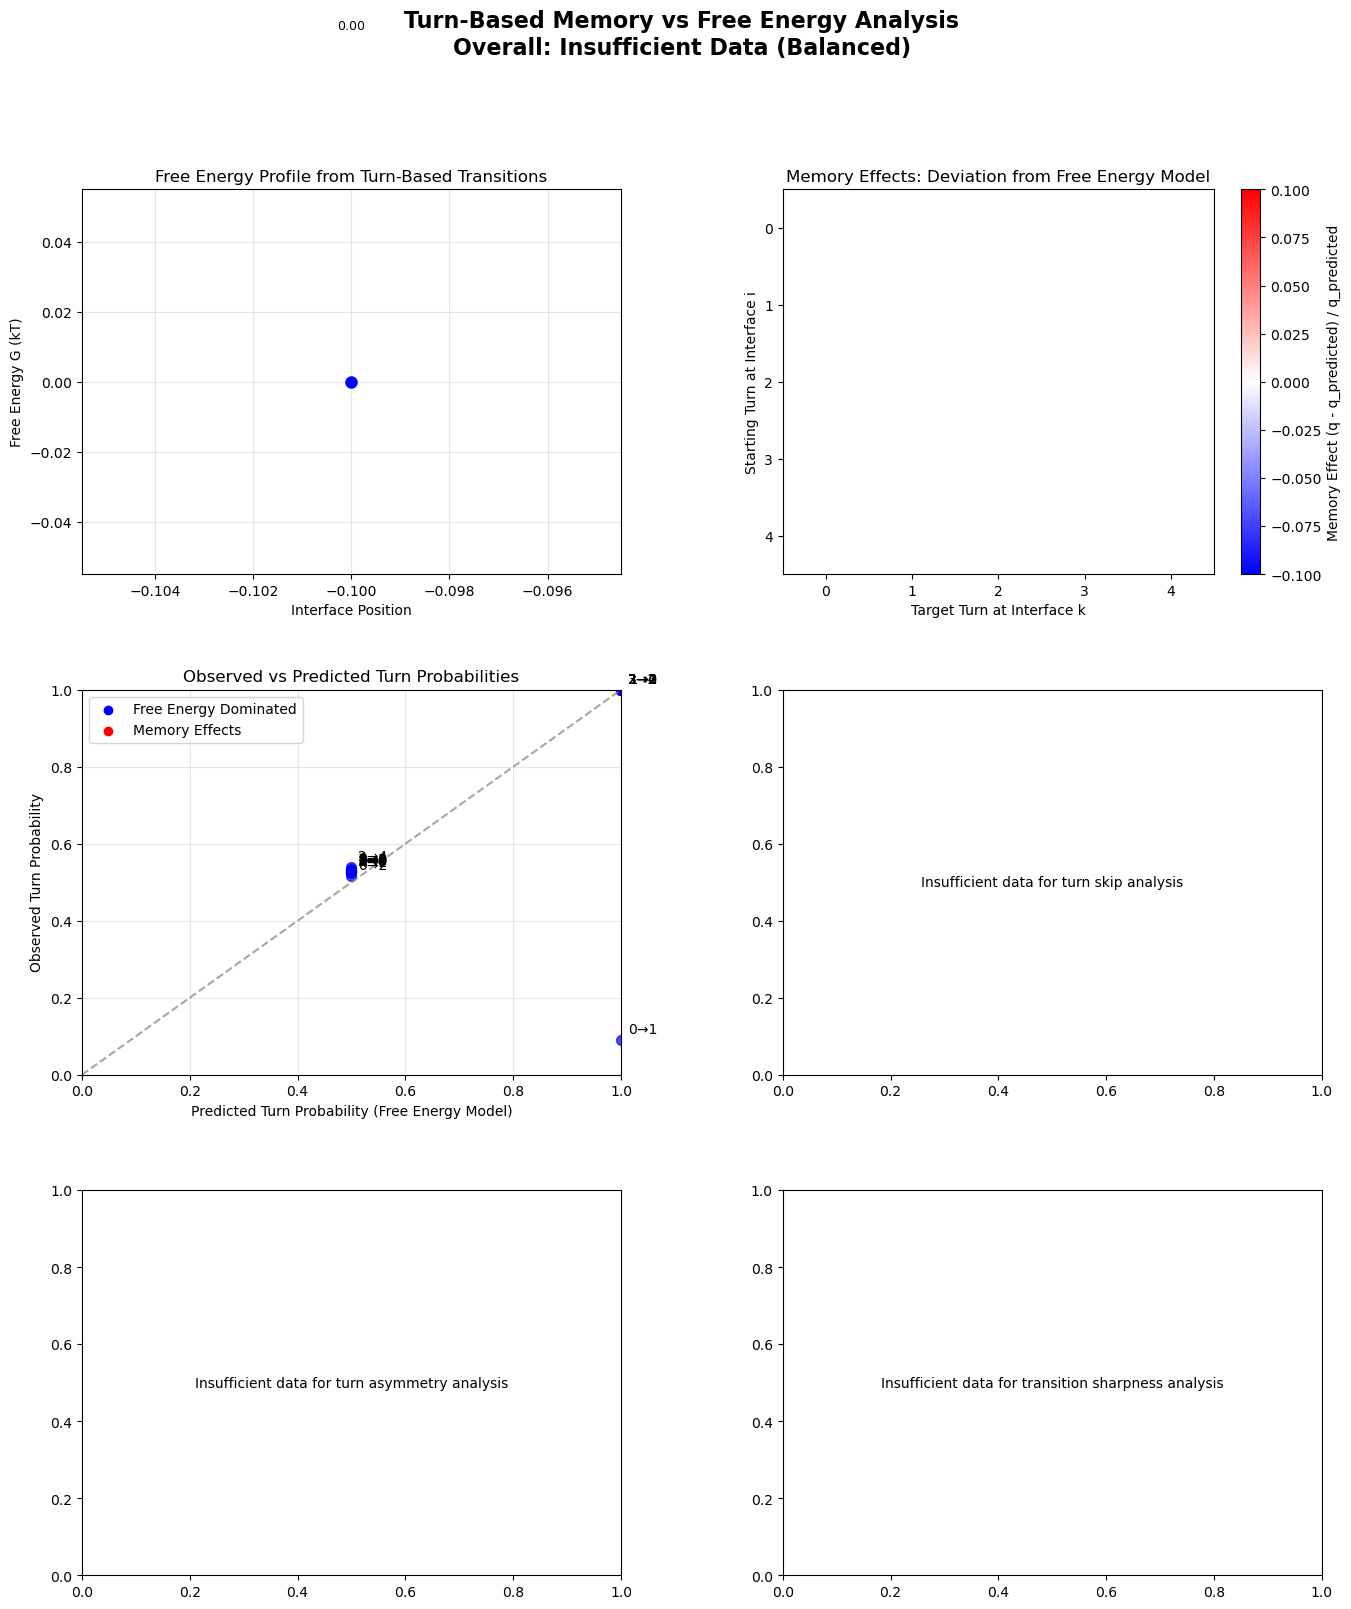

In [ ]:
results = analyze_memory_vs_free_energy_effects(interfaces, q_tot[0], q_tot[1])
visualize_turn_based_analysis(results, interfaces, q_tot[0], q_tot[1])

In [ ]:
# correct_ha is not correct, this flag computes the weights based on generation, not on ensemble
ploc_memory(pathensembles, interfaces, trr=True, correct_ha=False)

Weights of the different paths:
wRMR = 199999
wRML = 0
wLMR = 0
wLML = 0
Local crossing probabilities:
pRMR = 1.0
pRML = 0.0
pLMR = nan
pLML = nan
Local crossing probabilities:
p2R = 1.0
p2L = 0.0
None ha_factors for 0th ensemble
None
weights:
accepted      80191
rejected      119810
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 0:  0.0
None ha_factors for 1th ensemble
None
weights:
accepted      76633
rejected      123368
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 1:  199995.0

Intermediate transition probabilities (q matrix):
[[1.   0.09]
 [1.   0.  ]]

Final transition probabilities (p matrix):
[[0.91 0.09]
 [1.   0.  ]]

Local crossing probabilities computed successfully
200001 ha_factors for 0th ensemble
[1. 1. 1. ... 1. 1. 1.]
weights:
accepted      80191
rejected      119810
omitted       0
total trajs   200001
total weights 200001
Sum weights ensemble 0:  0.0
200001 ha_factors for 1th ensemble
[1. 1. 1. ... 1.

{'mlst': [1.0,
  0.09180853957030187,
  0.04233738820970524,
  0.028175350034868703,
  0.020907464348884],
 'apptis': [1.0,
  0.08999198835859452,
  0.0487701398306188,
  0.03190350729467664,
  0.024117791481924142],
 'apptis_ha': [1.0,
  0.09003166367832754,
  0.04664116749279475,
  0.03179683361126336,
  0.024132557141457563],
 'apptis_ha, norm': [1.0,
  0.09003166367832754,
  0.048811618958901265,
  0.03183346410256194,
  0.02413913237354107],
 'repptis': [1.0,
  0.09180853957030187,
  0.046834308891780224,
  0.03128888003921167,
  0.023498246605795855]}

## Stationary Distribution and MSM Analysis

In [ ]:
M = construct_M_istar(p, 2*len(interfaces), len(interfaces))
print(np.sum(M, axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# get stationary distrib
#------------------------
def get_summation_distr(M):
    # This is actually an eigenvector of M, with just ones in it.
    a = M-np.identity(len(M))
    # this would just be a constanct vector
    vals, vecs = np.linalg.eig(a)
    print(vals)
    order = np.argsort(abs(vals))
    vals = vals[order]
    print(vals)
    vec = vecs[:,order[0]]
    print(vec)

def get_stationary_distr(M):
    """Calculate stationary distr of M
    First substract identity matrix, such that
    the stationary vector is the LEFT eigenvecor of M
    corresponding with eigenvalue 0"""
    # for i in range(len(M)):
    #     if np.sum(M[:,i])==0:
    #         M = np.delete(np.delete(M, i, axis=0), i, axis=1)
    a = M-np.identity(len(M))

    vals, vecs = np.linalg.eig(a.T)
    #print(vals)
    order = np.argsort(abs(vals))
    vals = vals[order]
    #print(vals)
    vec = vecs[:,order[0]]
    #print(vec)

    # make vector positive
    if max(vec) < 0:
        vec *= -1
    # remove imaginary part of vector
    if np.sum(abs(vec-vec.real)) < 1e-8:
        vec = vec.real
    # all elements should be larger than zero
    assert vec.all()>=0
    #assert abs(np.sum(vec**2)-1) < 1e-8 # normalization is automatic
    # renormalize to sum=1
    vec /= np.sum(vec)
    return vec

summ_d = get_summation_distr(M)
stat_d = get_stationary_distr(M)
print("summation distr", summ_d)
print("stationary distr", stat_d)

[-1.        +0.j         0.        +0.j        -1.97680692+0.j
 -0.41885013+0.j        -1.61041115+0.j        -0.63931425+0.j
 -1.00027684+0.2182345j -1.00027684-0.2182345j -1.        +0.j
 -1.35406385+0.j       ]
[ 0.        +0.j        -0.41885013+0.j        -0.63931425+0.j
 -1.        +0.j        -1.        +0.j        -1.00027684+0.2182345j
 -1.00027684-0.2182345j -1.35406385+0.j        -1.61041115+0.j
 -1.97680692+0.j       ]
[-0.31622777+0.j -0.31622777+0.j -0.31622777+0.j -0.31622777+0.j
 -0.31622777+0.j -0.31622777+0.j -0.31622777+0.j -0.31622777+0.j
 -0.31622777+0.j -0.31622777+0.j]
summation distr None
stationary distr [0.45129202 0.02974558 0.45129202 0.0090848  0.00444405 0.
 0.01966928 0.0141168  0.00948836 0.01086708]


In [ ]:
# Create state labels for better readability
N = len(interfaces)
labels = generate_state_labels(N)

# Get different color/alpha combinations for each run
color_pairs = [('darkgreen', 'darkblue'), 
                ('purple', 'maroon'), ('orange', 'navy')]  # Add more pairs if needed
alpha_values = [0.5, 0.6, 0.7, 0.8]  # Different alpha values for different runs

# Get the current axis if it exists, otherwise create new figure
if plt.get_fignums():
    # Get the current figure
    fig = plt.gcf()
    ax1, ax2 = fig.axes
    
    # Use the next available color pair and alpha value
    used_runs = len([ax for ax in fig.axes if ax.patches])
    bar_color1, bar_color2 = color_pairs[used_runs % len(color_pairs)]
    alpha_val = alpha_values[used_runs % len(alpha_values)]
else:
    # Create a figure with two subplots for the first run
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [1, 1]})
    bar_color1, bar_color2 = color_pairs[0]
    alpha_val = alpha_values[0]

# Plot the stationary distribution as a bar chart with transparency
ax1.bar(range(len(stat_d)), stat_d, color=bar_color1, alpha=alpha_val, 
        label=f"{indir.split('/')[-2]}")
ax1.set_xticks(range(len(stat_d)))
ax1.set_xticklabels(labels, rotation=45, ha='right')
ax1.set_xlabel("State")
ax1.set_ylabel("Stationary Probability")
ax1.set_title("Stationary Distribution")
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend()

# Calculate the free energy: -ln(prob)
# Handle zero probabilities by setting them to NaN to avoid -inf
free_energy = -np.log(np.where(stat_d > 0, stat_d, np.nan))

# Plot the free energy with transparency
ax2.bar(range(len(stat_d)), free_energy, color=bar_color2, alpha=alpha_val, 
        label=f"{indir.split('/')[-2]}")
ax2.set_xticks(range(len(stat_d)))
ax2.set_xticklabels(labels, rotation=45, ha='right')
ax2.set_xlabel("State")
ax2.set_ylabel("Free Energy (-ln(P))")
ax2.set_title("Free Energy Landscape")
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend()

# Improve layout
plt.tight_layout()
plt.show()


ValueError: too many values to unpack (expected 2)

In [ ]:
print(stat_d[-1]/(stat_d[-2]+stat_d[-1]))
print(stat_d[-3]/np.sum(stat_d[-3:]))
print((np.sum(stat_d[2:len(interfaces)-1])/np.sum(stat_d[2:len(interfaces)+1]))*stat_d[-3]/np.sum(stat_d[-3:]))
print((np.sum(stat_d[2:len(interfaces)-2])/np.sum(stat_d[2:len(interfaces)+1]))*stat_d[-4]/np.sum(stat_d[-4:]))
print(stat_d[-3]/(stat_d[-3]+stat_d[-2]*(np.sum(stat_d[2:len(interfaces)-1])/np.sum(stat_d[2:len(interfaces)]))+stat_d[-1]*(np.sum(stat_d[2:len(interfaces)-1])/np.sum(stat_d[2:len(interfaces)+1]))))
print(stat_d[-3]/np.sum(stat_d[-3:]))
print(stat_d[4]/(stat_d[3]+stat_d[4]+stat_d[1]))

for i in range(3,len(pathensembles)+1):
    print(f"relative stat_d, turn fw {i-2}: {stat_d[i]/(stat_d[1]+np.sum(stat_d[2:i+1]))}")
for i in range(len(pathensembles)+1,2*len(pathensembles)-1):
    print(f"relative stat_d, turn bw {i-len(pathensembles)}: {stat_d[i]/np.sum(stat_d[i:])}")

0.5303783531908375
0.41103163386922403
0.40701627139218277
0.34762155288067187
0.413410240957604
0.41103163386922403
0.1043175578019284
relative stat_d, turn fw 1: 0.018978054066535705
relative stat_d, turn fw 2: 0.0091824760967452
relative stat_d, turn fw 3: 0.0
relative stat_d, turn bw 1: 0.3582891927886475
relative stat_d, turn bw 2: 0.41103163386922403
relative stat_d, turn bw 3: 0.4696216468091626


## Non-equilibrium Flux Analysis

In [ ]:
def analyze_nonequilibrium_flux(M, interfaces, n_int=None, group_first=3):
    """
    Analyze non-equilibrium steady-state fluxes between interfaces.
    
    Parameters
    ----------
    M : numpy.ndarray
        Non-reversible transition matrix
    interfaces : list
        List of interface positions
    n_int : int, optional
        Number of interfaces to consider
    group_first : int, optional
        Number of initial states to group together in visualization (default: 3)
        
    Returns
    -------
    dict
        Dictionary with non-equilibrium analysis results
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import networkx as nx
    
    if n_int is None:
        n_int = len(interfaces)
    
    # Find the stationary distribution using power iteration (robust for non-reversible matrices)
    n_states = M.shape[0]
    pi = np.ones(n_states) / n_states
    
    for _ in range(1000):
        pi_new = pi @ M
        change = np.linalg.norm(pi - pi_new/pi_new.sum())
        pi = pi_new / pi_new.sum()
        
        if change < 1e-10:
            break
    
    # Calculate the flux matrix
    flux = np.zeros_like(M)
    for i in range(n_states):
        for j in range(n_states):
            flux[i, j] = pi[i] * M[i, j]
    
    # Calculate the net flux matrix (flux - backwards flux)
    net_flux = flux - flux.T
    
    # Create a network visualization of the non-equilibrium fluxes
    G = nx.DiGraph()
    
    # Add nodes (with special handling for grouped nodes)
    for i in range(n_states):
        # Determine if this is an A-side or B-side state
        if i < n_int:
            side = 'A'
            interface = i
        else:
            side = 'B'
            interface = i - n_int
        
        # Add node attributes
        G.add_node(i, side=side, interface=interface, probability=pi[i])
    
    # Add edges with flux values
    for i in range(n_states):
        for j in range(n_states):
            if M[i, j] > 0:
                G.add_edge(i, j, flux=flux[i, j], net_flux=net_flux[i, j], 
                          transition_prob=M[i, j])
    
    # Calculate net fluxes between interface layers
    layer_fluxes = np.zeros((n_int, n_int))
    
    for i in range(n_states):
        for j in range(n_states):
            if flux[i, j] > 0:
                # Convert to interface indices
                i_interface = i % n_int
                j_interface = j % n_int
                layer_fluxes[i_interface, j_interface] += flux[i, j]
    
    # Calculate cyclic fluxes (a measure of non-reversibility)
    # Cycle detection in the graph
    cycles = list(nx.simple_cycles(G))
    cycle_fluxes = []
    
    for cycle in cycles:
        if len(cycle) > 1:  # Skip self-loops
            # Calculate the flux around this cycle
            cycle_flux = float('inf')
            for i in range(len(cycle)):
                j = (i + 1) % len(cycle)
                edge_flux = G.edges[cycle[i], cycle[j]]['flux']
                cycle_flux = min(cycle_flux, edge_flux)
                
            cycle_fluxes.append((cycle, cycle_flux))
    
    # Sort cycles by flux magnitude
    cycle_fluxes.sort(key=lambda x: x[1], reverse=True)
    
    # Calculate local crossing probabilities
    ploc_forward = np.zeros(n_int-1)
    ploc_backward = np.zeros(n_int-1)
    
    for i in range(n_int-1):
        # Forward probability (A->B)
        if pi[i] > 0:
            forward_flux = sum(flux[i, j] for j in range(n_int, 2*n_int))
            ploc_forward[i] = forward_flux / pi[i]
        
        # Backward probability (B->A)
        i_b = i + n_int
        if pi[i_b] > 0:
            backward_flux = sum(flux[i_b, j] for j in range(n_int))
            ploc_backward[i] = backward_flux / pi[i_b]
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot stationary distribution
    state_labels = [f"{i % n_int}({'A' if i < n_int else 'B'})" for i in range(n_states)]
    
    axes[0, 0].bar(range(n_states), pi, color=['blue' if i < n_int else 'red' for i in range(n_states)])
    axes[0, 0].set_xticks(range(n_states))
    axes[0, 0].set_xticklabels(state_labels, rotation=90)
    axes[0, 0].set_title('Non-Equilibrium Steady State Distribution')
    
    # Plot net flux matrix
    im = axes[0, 1].imshow(net_flux, cmap='RdBu', vmin=-np.max(np.abs(net_flux)), 
                          vmax=np.max(np.abs(net_flux)))
    axes[0, 1].set_title('Net Flux (Non-Equilibrium Effects)')
    plt.colorbar(im, ax=axes[0, 1])
    
    # Plot local crossing probabilities
    x = range(n_int-1)
    axes[1, 0].plot(x, ploc_forward, 'o-', label='Forward (A→B)', color='green')
    axes[1, 0].plot(x, ploc_backward, 's--', label='Backward (B→A)', color='orange')
    axes[1, 0].set_xlabel('Interface')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_ylabel('Crossing Probability')
    axes[1, 0].set_title('Local Interface Crossing Probabilities')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    # Network visualization of the strongest cycles (if any)
    if cycle_fluxes:
        # Create a simplified graph for visualization
        G_vis = nx.DiGraph()
        
        # Create node groups
        node_mapping = {}
        for i in range(n_states):
            if i < group_first and i < n_int:
                # Group the first few A states
                node_mapping[i] = f"0-{group_first-1}(A)"
            else:
                # Keep other nodes as is
                side = 'A' if i < n_int else 'B'
                interface = i % n_int
                node_mapping[i] = f"{interface}({side})"
        
        # Add nodes to the visualization graph
        for node_id, node_label in node_mapping.items():
            if node_label not in G_vis:
                side = G.nodes[node_id]['side']
                # Aggregate probabilities for grouped nodes
                if (node_label == f"0-{group_first-1}(A)" or 
                    node_label == f"0-{group_first-1}(B)"):
                    
                    start_idx = 0 if side == 'A' else n_int
                    end_idx = group_first if side == 'A' else (n_int + group_first)
                    prob = sum(pi[i] for i in range(start_idx, end_idx))
                else:
                    prob = G.nodes[node_id]['probability']
                
                G_vis.add_node(node_label, probability=prob, side=side)
        
        # Add edges with aggregated fluxes
        edge_fluxes = {}
        for i, j in G.edges:
            source = node_mapping[i]
            target = node_mapping[j]
            if (source, target) not in edge_fluxes:
                edge_fluxes[(source, target)] = 0
            edge_fluxes[(source, target)] += G.edges[i, j]['flux']
        
        for (source, target), flux_value in edge_fluxes.items():
            G_vis.add_edge(source, target, flux=flux_value, is_self_loop=(source == target))
        
        # Find top non-recursive transitions
        non_recursive_edges = [(s, t, data['flux']) for s, t, data in G_vis.edges(data=True) 
                                if not data['is_self_loop']]
        top_edges = sorted(non_recursive_edges, key=lambda x: x[2], reverse=True)[:3]
        top_edges_set = {(s, t) for s, t, _ in top_edges}
        
        # Draw the network graph with the strongest cycles highlighted
        pos = nx.spring_layout(G_vis, seed=42)
        
        # Node colors by side
        node_colors = ['blue' if G_vis.nodes[n]['side'] == 'A' else 'red' for n in G_vis.nodes]
        
        # Size by probability
        node_sizes = [3000 * G_vis.nodes[n]['probability'] + 100 for n in G_vis.nodes]
        
        # Draw nodes
        nx.draw_networkx_nodes(G_vis, pos, ax=axes[1, 1], node_color=node_colors, 
                             node_size=node_sizes, alpha=0.7)
        
        # Draw node labels
        nx.draw_networkx_labels(G_vis, pos, ax=axes[1, 1])
        
        # Draw regular edges
        regular_edges = [(u, v) for u, v in G_vis.edges() if (u, v) not in top_edges_set and u != v]
        regular_widths = [G_vis.edges[e]['flux'] * 20 + 0.5 for e in regular_edges]
        nx.draw_networkx_edges(G_vis, pos, ax=axes[1, 1], edgelist=regular_edges, 
                             width=regular_widths, alpha=0.3, edge_color='gray')
        
        # Draw self-loops
        self_loops = [(u, v) for u, v in G_vis.edges() if u == v]
        self_loop_widths = [G_vis.edges[e]['flux'] * 20 + 0.5 for e in self_loops]
        nx.draw_networkx_edges(G_vis, pos, ax=axes[1, 1], edgelist=self_loops, 
                             width=self_loop_widths, alpha=0.2, edge_color='lightgray',
                             connectionstyle="arc3,rad=0.3")
        
        # Highlight top non-recursive transitions
        if top_edges:
            top_widths = [G_vis.edges[(s, t)]['flux'] * 20 + 1.0 for s, t, _ in top_edges]
            nx.draw_networkx_edges(G_vis, pos, ax=axes[1, 1], edgelist=[(s, t) for s, t, _ in top_edges], 
                                 width=top_widths, alpha=0.9, edge_color='green', 
                                 arrows=True, arrowsize=15)
            
            # Add edge labels for top transitions
            edge_labels = {(s, t): f"{flux:.2e}" for s, t, flux in top_edges}
            nx.draw_networkx_edge_labels(G_vis, pos, edge_labels=edge_labels, ax=axes[1, 1], 
                                       font_size=8, label_pos=0.3)
            
            axes[1, 1].set_title('Network with Top 3 Non-Recursive Transitions Highlighted')
        else:
            axes[1, 1].set_title('Network (No Significant Non-Recursive Transitions)')
    else:
        axes[1, 1].set_visible(False)
    
    plt.tight_layout()
    
    return {
        'ploc_forward': ploc_forward,
        'ploc_backward': ploc_backward,
        'stationary_distribution': pi,
        'flux': flux,
        'net_flux': net_flux,
        'cycles': cycle_fluxes
    }


In [ ]:
analyze_nonequilibrium_flux(M, interfaces, len(interfaces))

{'ploc_forward': array([0.        , 0.        , 0.09003166, 1.        ]),
 'ploc_backward': array([0., 1., 1., 1.]),
 'stationary_distribution': array([0.45101125, 0.02969137, 0.45101125, 0.00929928, 0.00454113,
        0.        , 0.01950731, 0.01436079, 0.00966369, 0.01091392]),
 'flux': array([[0.        , 0.        , 0.45101125, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.02969137, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.41040596, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.01950731, 0.00995309, 0.00523733, 0.00590757],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.00440769, 0.00231634, 0.00257525],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.00211003, 0.0024311 ],
        [0.    

In [ ]:
# Create a time-reversible version of a transition matrix M with disconnected sets

import numpy as np
import matplotlib.pyplot as plt

# Compute the stationary distributions of the original matrix M
eigenvalues, eigenvectors = np.linalg.eig(M.T)
idx = np.where(np.isclose(eigenvalues, 1.0))[0]
stationary_vecs = eigenvectors[:, idx].real

# Identify disconnected components
disconnected_sets = []
n = M.shape[0]
visited = np.zeros(n, dtype=bool)

for i in range(n):
    if not visited[i]:
        # Find states reachable from i
        component = set()
        to_visit = [i]
        while to_visit:
            state = to_visit.pop()
            if not visited[state]:
                visited[state] = True
                component.add(state)
                for j in range(n):
                    if M[state, j] > 0 and not visited[j]:
                        to_visit.append(j)
        
        disconnected_sets.append(list(component))

print(f"Identified {len(disconnected_sets)} disconnected components:")
for i, component in enumerate(disconnected_sets):
    print(f"Component {i+1}: {component}")

# Identify states that can't be reached by any other state
unreachable_states = set()
for i in range(n):
    has_incoming = False
    for j in range(n):
        if i != j and M[j, i] > 0:
            has_incoming = True
            break
    if not has_incoming:
        unreachable_states.add(i)

if unreachable_states:
    print(f"States with no incoming transitions: {unreachable_states}")

# Compute stationary distribution for each component
pi_full = np.zeros(n)
for component in disconnected_sets:
    # Filter out unreachable states from the component
    valid_component = [s for s in component if s not in unreachable_states]
    
    if not valid_component:  # Skip if all states in component are unreachable
        continue
        
    # Extract submatrix for this component
    subset_idx = np.array(valid_component)
    submatrix = M[np.ix_(subset_idx, subset_idx)]
    
    # Find stationary distribution for this submatrix
    sub_eigen_vals, sub_eigen_vecs = np.linalg.eig(submatrix.T)
    
    # Check if there's a valid eigenvalue close to 1.0
    sub_idx_candidates = np.where(np.isclose(sub_eigen_vals, 1.0, atol=0.01))[0]
    
    if len(sub_idx_candidates) == 0:
        print(f"Warning: Component {valid_component} has no eigenvalue close to 1.0, skipping")
        continue
    
    sub_idx = sub_idx_candidates[0]  # Take first eigenvalue ≈ 1
    
    stationary_sub = sub_eigen_vecs[:, sub_idx].real
    
    # Check if the stationary distribution sums to a non-zero value
    if np.abs(stationary_sub.sum()) < 1e-10:
        print(f"Warning: Component {valid_component} has zero stationary distribution, skipping")
        continue
        
    stationary_sub = stationary_sub / stationary_sub.sum()  # Normalize
    
    # Place into full stationary vector
    pi_full[subset_idx] = stationary_sub

# Create a reversible transition matrix
M_reversible = np.zeros_like(M)

# For each component, apply reversibility correction
for component in disconnected_sets:
    # Filter out unreachable states
    valid_states = [s for s in component if s not in unreachable_states]
    
    for i in valid_states:
        for j in valid_states:
            # Skip if either probability is 0 (maintain sparsity)
            if M[i,j] > 0 or M[j,i] > 0:
                # Symmetric rate that preserves detailed balance
                if pi_full[i] > 0 and pi_full[j] > 0:
                    M_reversible[i,j] = (M[i,j] + (pi_full[j]/pi_full[i]) * M[j,i]) / 2

# Fix diagonal to ensure rows sum to 1
for i in range(n):
    if i not in unreachable_states:  # Only adjust diagonal for reachable states
        M_reversible[i,i] = 1.0 - np.sum(M_reversible[i,:]) + M_reversible[i,i]

# Verify reversibility
valid_states = np.array([i not in unreachable_states for i in range(n)])
valid_indices = np.where(valid_states)[0]
pi_valid = pi_full[valid_indices]
M_valid = M_reversible[np.ix_(valid_indices, valid_indices)]

# Check detailed balance condition: pi_i * P_ij = pi_j * P_ji
pi_matrix = pi_valid[:, np.newaxis] * M_valid
reversibility_check = np.abs(pi_matrix - pi_matrix.T)
max_violation = np.max(reversibility_check)
print(f"Maximum detailed balance violation: {max_violation:.2e}")

# Create full version of M_valid for proper comparison with M
M_reversible_display = np.full_like(M, np.nan)
M_reversible_display[np.ix_(valid_indices, valid_indices)] = M_valid

# Plot the original and reversible matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

im1 = ax1.imshow(M, cmap='viridis')
ax1.set_title("Original Transition Matrix")
plt.colorbar(im1, ax=ax1)

im2 = ax2.imshow(M_reversible_display, cmap='viridis')
ax2.set_title("Reversible Transition Matrix")
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()

print("Original matrix M:")
print(M)
print("\nReversible matrix:")
print(M_reversible_display)
print("\nStationary distribution:")
print(pi_full)

Identified 2 disconnected components:
Component 1: [0, 1, 2, 3, 4, 6, 7, 8, 9]
Component 2: [5]
States with no incoming transitions: {5}
Maximum detailed balance violation: 1.73e-18
Original matrix M:
[[0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.91000801 0.         0.         0.         0.         0.
  0.04358437 0.02177731 0.01148739 0.01314293]
 [0.         0.         0.         0.         0.         0.
  0.         0.47209285 0.2483071  0.27960005]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.46092526 0.53907474]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.52553871 0.         0.47446129 0.  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import sparse
from scipy.sparse.csgraph import connected_components, shortest_path
from tistools import analyze_network_connectivity, find_network_bottlenecks, calculate_effective_transitions

# Define the analysis functions
# [Copy the functions above here]

# Analyze network connectivity in your MSM transition matrix
if 'M' in locals():
    # Assuming M is your transition matrix
    print("Analyzing network connectivity structure...")
    
    # Determine if we are using the iSTAR model with 2N states
    n_interfaces = M.shape[0] // 2 if M.shape[0] % 2 == 0 else None
    
    if n_interfaces:
        print(f"Detected {n_interfaces} interfaces with {M.shape[0]} states.")
        # Check overall network connectivity
        connectivity = analyze_network_connectivity(M)
        print(f"Network has {connectivity['n_strong_components']} strongly connected components")
        print(f"Direct path from source to sink exists: {connectivity['direct_path_exists']}")
        
        if connectivity['critical_nodes']:
            print(f"Critical bridge states: {connectivity['critical_nodes']}")
            
        # Analyze bottlenecks
        bottlenecks = find_network_bottlenecks(M)
        if bottlenecks:
            print(f"Minimum cut value: {bottlenecks['cut_value']:.4f}")
            print(f"Cut edges: {bottlenecks['cut_edges']}")
            
        # Calculate effective transition probabilities
        effective_transitions = calculate_effective_transitions(M, max_steps=50)
        print(f"Effective transition probability: {effective_transitions['effective_probability']:.6f}")
        
        plt.figure(figsize=(10, 6))
        plt.plot(effective_transitions['cumulative_probabilities'], 'r.-')
        plt.xlabel('Number of Steps')
        plt.ylabel('Cumulative Probability')
        plt.title('Probability of Reaching Sink State from Source')
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("Could not determine network structure. Please provide the number of interfaces.")
else:
    print("Transition matrix 'M' not found. Please calculate it first.")

Analyzing network connectivity structure...
Detected 5 interfaces with 10 states.
Network has 2 strongly connected components
Direct path from source to sink exists: True
Critical bridge states: {2}
Minimum cut value: 0.0464
Cut edges: [(2, 7), (2, 8), (2, 9)]
Effective transition probability: 0.020690


In [ ]:
pcca = pcca_analysis(M_valid, 5)
committor = dpt.markov.tools.analysis.committor(M, [0, 1], [M.shape[0]-1,])
print("Committor probabilities:")
print(committor)

PCCA+ Membership Matrix:
[[2.78093906e-06 0.00000000e+00 3.43573207e-01 3.01249243e-02
  6.26299088e-01]
 [5.20142493e-02 3.19746312e-01 1.47409261e-01 4.80830178e-01
  0.00000000e+00]
 [1.85470116e-18 1.19011549e-03 3.38412261e-01 5.64154278e-01
  9.62433452e-02]
 [2.18633728e-01 6.46929688e-01 0.00000000e+00 1.34394321e-01
  4.22625279e-05]
 [2.56710587e-01 6.97478955e-02 3.99871189e-01 0.00000000e+00
  2.73670329e-01]
 [9.70731317e-04 2.70026091e-01 2.28999490e-01 2.39481679e-02
  4.76055520e-01]
 [6.70260429e-03 4.54082605e-01 3.04638013e-01 1.11621341e-02
  2.23414644e-01]
 [8.84000108e-03 4.86154971e-02 7.11449604e-01 3.71369291e-04
  2.30723528e-01]
 [1.18974704e-05 5.11987866e-03 4.81100990e-01 2.92611949e-01
  2.21155285e-01]]
Metastable States:
State 1: [] (indices: [])
State 2: ['[1$\\subset$]', '[4$\\subset$]'] (indices: [3 6])
State 3: ['[2$\\subset$]', '[5$\\subset$]', '[6$\\subset$]'] (indices: [4 7 8])
State 4: ['[0←]', '[0→]'] (indices: [1 2])
State 5: ['[0$^-$]', '[3$

In [ ]:
print("Using msmtools will also work for hitting probs.")
# Let's try with msmtools, this should definitely work as well.
# I already know I can't solve the MFPT question with this, but 
# this might come in handy whenever we DO include multidimensionality
# from msmtools.analysis import (is_transition_matrix, is_connected, mfpt, 
#                                stationary_distribution, is_reversible)
from deeptime.markov.tools.estimation import is_connected, largest_connected_set, largest_connected_submatrix
from deeptime.markov.tools.analysis import stationary_distribution, is_transition_matrix, is_reversible

print("Using transition matrix with disconnected states: ")
print("is_tmat: ", is_transition_matrix(M_valid))
print("is_connected: ", is_connected(M_valid))
print("largest conn set: ", largest_connected_set(M_valid))
print("stationary_distribution: ", stationary_distribution(largest_connected_submatrix(M_valid)))
print("is_reversible: ", is_reversible(M_valid))

Using msmtools will also work for hitting probs.
Using transition matrix with disconnected states: 
is_tmat:  True
is_connected:  True
largest conn set:  [0 1 2 3 4 5 6 7 8]
stationary_distribution:  [0.45129202 0.02974558 0.45129202 0.0090848  0.00444405 0.01966928
 0.0141168  0.00948836 0.01086708]
is_reversible:  True


In [ ]:
# define states A and B
A = [1]
B = [-2]
# Get the committtor probabilities
from msmtools.analysis import committor
from msmtools.flux import tpt
test = tpt(M_valid[1:-1,1:-1], A, B)
print("Same value?", (pmp0plus * plocs[0][-1][1] * test.committor)[0])
print("Real value:", 0.00020540578383777418)
print("So this works as expected")

ModuleNotFoundError: No module named 'msmtools'

In [ ]:
import numpy as np
import networkx as nx
from matplotlib.colors import LinearSegmentedColormap

# Compute flux matrix and identify dominant pathways
import matplotlib.pyplot as plt

# Define initial and final states
initial_states = [0,1]  # First state (typically state A)
final_states = [len(M_valid)-1,]  # Last state (typically state B)

# Create a ReactiveFlux object
flux = dpt.markov.reactive_flux(M_valid, source_states=initial_states, target_states=final_states)

# Get the flux matrix
flux_matrix = flux.net_flux
print("Flux M_validatrix:")
print(flux_matrix)

# Get the total flux
total_flux = flux.gross_flux
print("Total Flux:") 
print(np.sum(total_flux))

# Identify dominant pathways
paths, path_fluxes = flux.pathways(fraction=1)  # Extract paths accounting for 95% of total flux
print("\nDominant Pathways:")
for i, (path, path_flux) in enumerate(zip(paths, path_fluxes)):
    # Format path with state names
    path_str = " → ".join([f"{state}" for state in path])
    percentage = path_flux / flux.total_flux * 100
    print(f"Path {i+1}: {path_str}")
    print(f"  Flux: {path_flux:.6e} ({percentage:.2f}% of total flux)")

# Create a more appealing visualization of the flux network
plt.figure(figsize=(12, 8))

# Create a directed graph
G = nx.DiGraph()

# Add nodes with positions arranged in a circle
n_nodes = M_valid.shape[0]

# Use string labels for nodes based on interfaces for better readability
if 'labels1' in globals() and 'labels2' in globals():
    # If we have labels defined in earlier cells, use them
    node_labels = []
    for i in range(n_nodes):
        if i < len(labels1):
            node_labels.append(labels1[i])
        elif i < len(labels1) + len(labels2):
            node_labels.append(labels2[i - len(labels1)])
        else:
            node_labels.append(f"State {i}")
else:
    # Default to numeric labels
    node_labels = [f"State {i}" for i in range(n_nodes)]

# Add nodes with attributes
for i in range(n_nodes):
    G.add_node(i, label=node_labels[i])

# Add edges with weights from the flux matrix
for i in range(n_nodes):
    for j in range(n_nodes):
        if flux_matrix[i, j] > 0:
            G.add_edge(i, j, weight=flux_matrix[i, j])

# Get positions in a circular layout
pos = nx.circular_layout(G)

# Create a custom colormap for the edges (blue to red)
cmap = LinearSegmentedColormap.from_list("flux_cmap", ["lightblue", "blue", "darkblue"])

# Draw the graph
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
max_weight = max(weights) if weights else 1.0
norm_weights = [w / max_weight for w in weights]

# Draw nodes with different colors for source, target, and intermediate states
node_colors = []
for node in G.nodes():
    if node in initial_states:
        node_colors.append('lightgreen')  # Source states in green
    elif node in final_states:
        node_colors.append('red')  # Target states in red
    else:
        node_colors.append('lightgray')  # Intermediate states in gray

# Draw the network
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, alpha=0.8)
nx.draw_networkx_labels(G, pos, labels={i: node_labels[i] for i in range(n_nodes)}, font_size=10)
nx.draw_networkx_edges(G, pos, width=[30 * w for w in norm_weights], 
                       edge_color=norm_weights, edge_cmap=cmap, 
                       connectionstyle='arc3,rad=0.1', arrowsize=20, alpha=0.7)

# Add edge labels with flux values
edge_labels = {(u, v): f"{G[u][v]['weight']:.2e}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Reactive Flux Network")
plt.axis('off')
plt.tight_layout()
plt.show()

# Calculate committor probabilities
forward_committor = flux.forward_committor
backward_committor = flux.backward_committor

print("\nForward Committor Probabilities (probability to reach target before returning to source):")
for i in range(len(forward_committor)):
    print(f"State {i}: {forward_committor[i]:.4f}")

print("\nBackward Committor Probabilities (probability to have come from source rather than target):")
for i in range(len(backward_committor)):
    print(f"State {i}: {backward_committor[i]:.4f}")

Flux M_validatrix:
[[0.00000000e+00 0.00000000e+00 3.87385634e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.43354224e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.41986574e-05 3.80113145e-04 2.78334344e-04
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.59371463e-04 5.19691221e-04
  2.93899232e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.45824179e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.91685994e-04]
 [0.00000000e+00 0.00000000e+00 4.41986574e-05 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.39484609e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.0

## Network Visualization

In [ ]:
# make_plot_trajs("paths002test", "./002", interfaces, 5)

In [ ]:
# if 'repptis' in fol:
#     plot_rv_repptis(pathensembles, interfaces, 3)
# else:
#     plot_rv_star(pathensembles, interfaces, 1)

In [ ]:
# plot_rv_comp(pathensembles, interfaces, 1, 1, (2,4))
# while True:
#     try:
#         plot_rv_comp(pathensembles, interfaces, 1, 1, (2,4))
#         break
#     except:
#         plt.close("all")
#         continue

In [ ]:
# Plot network
def plot_network(P, figname, source=None, target=None):
    """
    Network plots
    =============
    
    We demonstrate different kinds of network plots based on :meth:`plots.Network <deeptime.plots.Network>`.
    In particular:
    
        * plotting a Markov state model where the state sizes depend on the stationary distribution and edges are scaled
          according to jump probabilities (:meth:`deeptime.plots.plot_markov_model`)
        * plotting the gross flux, in accordance to edge widths and colored according to the forward committor
          (:meth:`deeptime.plots.Network`).
    """
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import networkx as nx
    
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    from deeptime.markov.msm import MarkovStateModel
    from deeptime.plots import plot_markov_model, Network, plot_flux
    
    if source is None:
        source = 0
    elif target is None:
        target = len(P)-1

    f1, axes1 = plt.subplots(figsize=(16, 12))
    axes1.set_aspect('equal')
    f2, axes2 = plt.subplots(figsize=(16, 12))
    axes2.set_aspect('equal')
    f3, axes3 = plt.subplots(figsize=(16, 12))
    axes3.set_aspect('equal')

    ax = axes1
    ax.set_title('Plotting the Markov model')
    plot_markov_model(P, ax=ax)
    
    ax = axes2
    ax.set_title('Plotting the gross flux')
    flux = MarkovStateModel(P).reactive_flux(source_states=source,
                                             target_states=target)
    positions = nx.multipartite_layout(nx.from_numpy_array(flux.gross_flux))
    #cmap = mpl.cm.get_cmap('coolwarm')
    cmap = mpl.colormaps['coolwarm'] #m.get_cmap('coolwarm')
    network = Network(flux.gross_flux, positions, edge_curvature=2.,
                      state_colors=flux.forward_committor, cmap=cmap)
    network.plot(ax=ax)
    norm = mpl.colors.Normalize(vmin=np.min(flux.forward_committor), vmax=np.max(flux.forward_committor))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    f1.colorbar(mpl.cm.ScalarMappable(norm, cmap), cax=cax)
    
    ax = axes3
    ax.set_title('Plotting the net flux')
    ax.get_yaxis().set_visible(False)
    plot_flux(flux, attribute_to_plot='net_flux', ax=ax)
    
    plt.show()
    # f.savefig(figname)

In [ ]:
A = [0]
B = [len(M_valid)-1]

plot_network(M_valid, "fig_try-plot-network-M.png", source=A, target=B)
# from deeptime.plots import plot_markov_model, Network, plot_flux
# plot_markov_model(M)

LinAlgError: Matrix is singular.

# Error analysis (recursive block analysis)

In [ ]:
from tistools import block_error_analysis_staple
import logging
import sys
from datetime import datetime
from contextlib import redirect_stdout, redirect_stderr

# Create a log file with timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
log_filename = f"block_error_analysis_{timestamp}.log"

# Configure logging to file
file_handler = logging.FileHandler(log_filename, mode='w')
formatter = logging.Formatter('%(message)s')
file_handler.setFormatter(formatter)

# Create logger
log = logging.getLogger()
log.setLevel(logging.INFO)
log.handlers = [file_handler]  # Replace any existing handlers

# Write initial message to log file only
log.info(f"Starting block error analysis at {timestamp}")

# Open the log file for capturing all output
with open(log_filename, 'a') as log_file, redirect_stdout(log_file), redirect_stderr(log_file):
    # Run the block error analysis for StapleTIS
    block_error_analysis_staple(pathensembles, interfaces, 1, pl=False)
    
    # Calculate REPPTIS probabilities for comparison
    repptisploc = []
    for i, pe in enumerate(pathensembles):
        # REPPTIS p_loc
        repptisploc.append(get_local_probs(pe, tr=False))

    _, _, reppfull = get_global_probs_from_dict(repptisploc)
    
    # Write REPPTIS results to log file
    print("\nREPPTIS global crossing probabilities:")
    for i, p in enumerate(reppfull):
        print(f"Interface {i}: {p:.8f}")

# Log file path is the only output to notebook
log.info(f"Analysis complete - results saved to {log_filename}")


In [ ]:
# PyRETIS code for block error analysis
 
def block_error(data, maxblock=None, blockskip=1):
    """
    Perform block error analysis to estimate the standard deviation in the input data.

    Parameters
    ----------
    data : numpy.array
        The data to analyze.
    maxblock : int, optional
        Maximum block length to consider. Defaults to half the length of the input data.
    blockskip : int, optional
        Skip factor for block lengths. Defaults to 1 (all block lengths considered).

    Returns
    -------
    blocklen : numpy.array
        Array of block lengths considered.
    block_avg : numpy.array
        Block averages as a function of block length.
    block_err : numpy.array
        Standard error estimates as a function of block length.
    block_err_avg : float
        Average error estimate for block lengths greater than maxblock//2.
    """
    n = len(data)
    maxblock = min(maxblock or n // 2, n // 2)
    
    blocklen = np.arange(1, maxblock + 1, blockskip, dtype=np.int_)
    n_blocks = len(blocklen)
    
    block = np.zeros(n_blocks)
    nblock = np.zeros(n_blocks)
    block_avg = np.zeros(n_blocks)
    block_var = np.zeros(n_blocks)

    for i, val in enumerate(data):
        block += val
        full_blocks = (i + 1) % blocklen == 0
        block[full_blocks] /= blocklen[full_blocks]
        nblock[full_blocks] += 1
        deltas = block[full_blocks] - block_avg[full_blocks]
        block_avg[full_blocks] += deltas / nblock[full_blocks]
        block_var[full_blocks] += deltas * (block[full_blocks] - block_avg[full_blocks])
        block[full_blocks] = 0.0

    block_var /= (nblock - 1)
    block_err = np.sqrt(block_var / nblock)
    
    large_blocks = blocklen > maxblock // 2
    block_err_avg = np.mean(block_err[large_blocks])
    
    return blocklen, block_avg, block_err, block_err_avg, maxblock, n//maxblock


def block_error_corr(data, maxblock=None, blockskip=1):
    """
    Run block error analysis and calculate correlation length estimates.

    Parameters
    ----------
    data : numpy.array
        Data to analyze.
    maxblock : int, optional
        Maximum block length to consider. Defaults to half the length of the input data.
    blockskip : int, optional
        Skip factor for block lengths. Defaults to 1 (all block lengths considered).

    Returns
    -------
    blen : numpy.array
        Block lengths considered.
    berr : numpy.array
        Error estimates as a function of block length.
    berr_avg : float
        Average error estimate for blocks with length > maxblock // 2.
    rel_err : numpy.array
        Relative error normalized by the overall average as a function of block length.
    avg_rel_err : float
        Average relative error for blocks with length > maxblock // 2.
    ncor : numpy.array
        Estimated correlation length as a function of block length.
    avg_ncor : float
        Average correlation length for blocks with length > maxblock // 2.
    """
    blen, bavg, berr, berr_avg, max_block_size, min_block_number = block_error(data, maxblock=maxblock, blockskip=blockskip)
    rel_err = berr / abs(bavg[0])
    avg_rel_err = berr_avg / abs(bavg[0])
    ncor = (berr / berr[0])**2
    avg_ncor = (berr_avg / berr[0])**2
    
    return blen, berr, berr_avg, rel_err, avg_rel_err, ncor, avg_ncor, max_block_size, min_block_number

def pathensembles_nskip(obj, nskip):
    keys = [
        'cyclenumbers', 'flags', 'generation', 'lambmaxs', 'lambmins',
        'lengths', 'lmrs', 'newpathnumbers', 'pathnumbers',
        'shootlinks', 'weights', 'dirs', 'istar_idx']
    for key in keys:
        attr = getattr(obj, key)
        setattr(obj, key, attr[:nskip])

In [ ]:
%%capture
from datetime import datetime
import copy

start_cyc = 1
n_cycle = 100000
nstep = 1

ploc_MSM_stored = []
ploc_repptis_stored = []
# This loops over the npy file and calculates tau from cycle 100 every 10 cycles
for nskip in range(start_cyc, n_cycle, nstep):
    pathensemblesi = copy.deepcopy(pathensembles)
    for i, pe in enumerate(pathensemblesi):
        pathensembles_nskip(pe,nskip)
    # Analysis output is saved to the data dictionary.
    data = {}
    for i, pe in enumerate(pathensemblesi):
        if i == 0:
            data[i] = {}
            continue  #  [0-] is not used for Pcross calculations
        
        # Classify the paths according to their path type.
        pathtypes = ("LML", "LMR", "RML", "RMR")
        pathtype_cycles = {}
        for ptype in pathtypes:
            pathtype_cycles[ptype] = unwrap_by_weight(
                    (pe.lmrs == ptype).astype(int), pe.weights)
        
        data[i] = {}
        plocfull = get_local_probs(pe, tr=False)
        data[i]["full"] = {}
        for ptype in pathtypes:
            data[i]["full"][ptype] = plocfull[ptype]

    psfull = []
    for i in range(1, len(pathensemblesi)):   # do not use the 0- ensemble
        psfull.append({"LMR": data[i]["full"]["LMR"], 
                "RML": data[i]["full"]["RML"], 
                "RMR": data[i]["full"]["RMR"],
                "LML": data[i]["full"]["LML"]})

    Pminfull, Pplusfull, Pcrossfull = get_global_probs_from_dict(psfull)

    ploc_repptis_stored.append(Pcrossfull)
    
    N = len(interfaces)
    NS = 2*N

    wi = compute_weight_matrices(pathensemblesi, interfaces, len(interfaces), True)
    pi, _ = get_transition_probzz(wi)
    # pi = get_transition_probs(wi)
    # pi = get_simple_probs(wi)
    M = construct_M_istar(pi, max(4, 2*len(interfaces)), len(interfaces))

    plocMSM = np.ones(len(interfaces))
    for lint in range(1, len(interfaces)):
        # Mi = M[:min(NS, 1+2*lint), :min(NS, 1+2*lint)]
        Mi = M[np.r_[0:2+lint, 1+N:N+lint, -1]]
        Mi = Mi[:, np.r_[0:2+lint, 1+N:N+lint+1]]
        Msum = M[np.r_[0:2+lint, 1+N:N+lint+1]]
        Mi[:, -1] = np.sum(Msum[:, N+lint:], axis=1)
        
        # wi2 = compute_weight_matrices(pathensemblesi[:lint+1], interfaces[:lint+1], len(interfaces), True)
        # pi2 = get_transition_probzz(wi2)
        # # pi = get_transition_probs(wi)
        # # pi = get_simple_probs(wi)
        # Mi2 = construct_M_istar(pi2, max(4, 2*len(interfaces[:lint+1])), len(interfaces[:lint+1]))

        # print(Mi == Mi2)

        z1, z2, y1, y2 = global_pcross_msm_star(Mi)
        plocMSM[lint] = y1[0][0]
    # print(f"plocs: ", plocMSM)

    pcrosslocMSM = np.empty(len(plocMSM))

    for i in range (len(pcrosslocMSM)):
        pcrosslocMSM[i] = plocMSM[i]/np.prod(pcrosslocMSM[:i])
    # print(pcrosslocMSM)

    ploc_MSM_stored.append(plocMSM)

    # for i,fol in enumerate(folders):
    #     set_tau_distrib(pathensemblesi[i])
    #     if True:
    #         set_tau_first_hit_M_distrib(pathensemblesi[i])

    # Compute taus for pathlength analysis
    timestamp = datetime.now().strftime("%H:%M:%S")
    print(f"{nskip:5d} cycles, Plocs {plocMSM}")

    # Not sure if we need this, need to check later
    del data
    del Mi, wi, pi, z1, z2, y1, y2,N, NS
    del Pcrossfull, Pminfull, Pplusfull
    del plocMSM, pcrosslocMSM

np.save('plocMSM_vs_cycle_interval_1_full.npy', ploc_MSM_stored)
np.save('plocREPPTIS_vs_cycle_interval_1_full.npy', ploc_repptis_stored)

In [ ]:
# Adapted AG, Jan 17, 2025

#----------------
# part Titus
#----------------

# SETTINGS

minblocks = 5 #the minimal number of blocks
filerunav = "plocMSM_vs_cycle_interval_1_full.npy"

# FUNCTIONS

def get_second_column(file):
    arr = []
    with open(file, "r") as f:
        for line in f:
            values = line.strip().split()
            arr.append(float(values[1]))
    return arr
 
def get_first_column(file):
    arr = []
    with open(file, "r") as f:
        for line in f:
            values = line.strip().split()
            arr.append(float(values[0]))
    return arr
 
def rec_blocks(r):
    # no longer used
    """Compute the vector b, which is ... """
    b = np.zeros(len(r))
    for i in range(len(r)):
        if i == 0:
            b[i] = r[i]
        else:
            b[i] = (i+1) * r[i] - i * r[i - 1]
    return b
 
def rec_blocks_from_runav(runav, n):
    # see paper Vervust et al. PyRETIS3, 2024
    # paper: select values k[j*m], indexing starts at 1
    # here: runav, python indexing, so start index n-1 (end of first block)
    # collect them in runav_red
    assert n>0   # block size
    runav_red = runav[n-1::n]
    nb = len(runav_red)  # number of blocks
 
    # array b with average of each block
    b = np.zeros(nb)
    for i in range(nb):
        if i == 0:
            b[i] = runav_red[i]
        else:
            b[i] = (i+1) * runav_red[i] - i * runav_red[i - 1]
    return b
 
def compute_absolute_error(runavfull, bestav, n):
    # compute average in each block
    assert n>0
    blocks = rec_blocks_from_runav(runavfull, n)
    # compute standard deviation between blocks
    sum_qudiff = np.sum((blocks-bestav)**2)
    nb = len(blocks)
    assert nb>1
    Aerr2 = sum_qudiff/(nb*(nb-1))
    Aerr = np.sqrt(Aerr2)  #esitimate of absolute error
    return Aerr
 
 
# GET STARTED
 
# runavfull = get_second_column(filerunav) #all the running average data in an array
runavfull = np.load(filerunav)
runavfull = runavfull[5:,:]
maxbll = int(len(runavfull)/minblocks) #maximum block length
bestav = runavfull[-1] #most accurate average we have
print("maximum block length = ", maxbll)
 
# loop over block size
sizes = np.arange(1,maxbll+1)
if len(np.shape(runavfull)) == 1:
    rel_errors = np.zeros(len(sizes)) if len(np.shape(runavfull)) == 1 else np.zeros((len(sizes), np.shape(runavfull)[1]))
    for i, n in enumerate(sizes):
        # n is block size
        Aerr = compute_absolute_error(runavfull, bestav, n)
        Rerr = Aerr/bestav
        rel_errors[i] = Rerr
    
    second_half = rel_errors[len(rel_errors)//2:]
    half_av_err = np.mean(second_half)
    print("estimated relative error=", half_av_err)
    Nstatineff=(half_av_err/rel_errors[0])**2
    print("statistical inefficiency=", Nstatineff)
    
    plt.figure()
    plt.plot(sizes, rel_errors)
    plt.axhline(y=half_av_err, color='r', linestyle='--')
    plt.xlabel('Block Length')
    plt.ylabel('Relative Error')
    plt.title('Error Analysis')
    plt.show()
    # plt.savefig("figure_titus.png")

elif len(np.shape(runavfull)) == 2:
    rel_errs = np.empty(len(interfaces))
    for loc in range(len(interfaces)):
        rel_errors = np.zeros(len(sizes))
        intf_i = runavfull[:,loc]
        bestav = intf_i[-1]
        for i, n in enumerate(sizes):
        # n is block size
            Aerr = compute_absolute_error(intf_i, bestav, n)
            Rerr = Aerr/bestav
            rel_errors[i] = Rerr

        second_half = rel_errors[len(rel_errors)//2:]
        half_av_err = np.mean(second_half)
        rel_errs[loc] = half_av_err
        print("estimated relative error=", half_av_err)
        Nstatineff=(half_av_err/rel_errors[0])**2
        print("statistical inefficiency=", Nstatineff)
        
        plt.figure()
        plt.plot(sizes, rel_errors)
        plt.axhline(y=half_av_err, color='r', linestyle='--')
        plt.xlabel('Block Length')
        plt.ylabel('Relative Error')
        if loc < len(interfaces)-1:
            plt.title('Error Analysis $p_{local}$'+f' - interface {loc}')
        else:
            plt.title('Error Analysis $P_{cross}$')
        plt.show()
        # plt.savefig("figure_titus.png")

maximum block length =  19998
estimated relative error= 0.0
statistical inefficiency= nan


/tmp/ipykernel_400959/1067094454.py:122: RuntimeWarning: invalid value encountered in scalar divide
  Nstatineff=(half_av_err/rel_errors[0])**2


estimated relative error= 0.035026263859068325
statistical inefficiency= 12.803962037331534
estimated relative error= 0.03629506752480279
statistical inefficiency= 12.30855799268715
estimated relative error= 0.03860426506193927
statistical inefficiency= 13.119834706021457
estimated relative error= 0.04187121021039022
statistical inefficiency= 14.386298466893177
estimated relative error= 0.043738990358359854
statistical inefficiency= 14.632355747315064
estimated relative error= 0.0496850196134735
statistical inefficiency= 16.65657467803505
estimated relative error= 0.07627598921717178
statistical inefficiency= 36.33504361711302
estimated relative error= 0.07892064974077292
statistical inefficiency= 38.587801289250514
estimated relative error= 0.08168128812169928
statistical inefficiency= 41.15697280835939
estimated relative error= 0.08358957475156441
statistical inefficiency= 42.79071205318213


In [ ]:
stored_values = np.load('plocREPPTIS_vs_cycle_interval_10.npy')

if len(np.shape(stored_values)) == 1:
    stored_values = stored_values[~np.isnan(stored_values)] # remove nans in the beginning
    blen, berr, berr_avg, rel_err, avg_rel_err, ncor, avg_ncor, max_block_size, min_block_number = block_error_corr(stored_values,10)
    print("=" * 60)
    print(indir[57:-9])
    print(f"Total Data Points: {len(stored_values)}, max block size: {max_block_size}, min block number: {min_block_number}")
    print(f"Average Relative Error for blocks > maxblock/2: {avg_rel_err * 100:.1f}%")
    print(f"Average Correlation Length for Large Blocks: {int(avg_ncor)}")
    plt.figure(figsize=(8, 6))
    plt.plot(rel_err, marker='o', linestyle='-', label = indir[57:-9])
    plt.xlabel("Block Size")
    plt.ylabel("Rlative Error")
    plt.title(f"Ave Rel Err (blocks > maxblock/2): {avg_rel_err * 100:.1f}%, Block interval 10 cycles")
    plt.grid(True)
    plt.legend()
    # plt.savefig("Block_Error_Tau.png", dpi=1000, bbox_inches='tight')
elif len(np.shape(stored_values)) == 2:
    rel_errs = np.empty(len(interfaces))
    for loc in range(1,len(interfaces)):
        intf_i = stored_values[:,loc]
        blen, berr, berr_avg, rel_err, avg_rel_err, ncor, avg_ncor, max_block_size, min_block_number = block_error_corr(intf_i[~np.isnan(intf_i)],1000)
        rel_errs[loc] = avg_rel_err

        print("=" * 60)
        print(indir[57:-9])
        print(f"Total Data Points: {len(stored_values)}, max block size: {max_block_size}, min block number: {min_block_number}")
        print(f"Average Relative Error for blocks > maxblock/2: {avg_rel_err * 100:.10f}%")
        print(f"Average Correlation Length for Large Blocks: {int(avg_ncor)}")
        plt.figure(figsize=(8, 6))
        plt.plot(rel_err, linestyle='-', label = indir[57:-9])
        plt.xlabel("Block Size")
        plt.ylabel("Rlative Error")
        plt.title(f"Ave Rel Err (blocks > maxblock/2): {avg_rel_err * 100:.1f}%, Block interval 10 cycles")
        plt.grid(True)
        plt.legend()
        # plt.savefig("Block_Error_Tau.png", dpi=1000, bbox_inches='tight')

# Bootstrap 👢 analysis

In [ ]:
from tistools import bootstrap_istar_analysis

In [ ]:
from tistools import find_closest_number_lte
def bootstrap_istar_analysis2(pathensembles, interfaces, nN=10, nB=1000):
    N = len(interfaces)
    NS = max(3, 2*len(interfaces))
    data = {}
    # for each pathensemble, we save the indices of accepted cycle numbers in a
    # dictionary, because we will use this a lot. We do not accept load cycles, 
    # so if a load cycle is sampled, we will just not use it. 
    pathcycle_ids = {}
    for i, pe in enumerate(pathensembles):
        loadmask = get_generation_mask(pe, "load")
        accmask = get_flag_mask(pe, "ACC")
        pathcycle_ids[i] = select_with_masks(pe.cyclenumbers,
                                             [accmask, ~loadmask])
    for Bcycle in np.arange((pathensembles[0].cyclenumbers)[-1]//nN,
                            (pathensembles[0].cyclenumbers)[-1],
                            ((pathensembles[0].cyclenumbers)[-1]//nN)):
        logger.info(f"Doing bootstrap analysis for cycle {Bcycle}")
        # We produce a list of the data for each timeslice
        ts_data = {}
        for j in range(nB):
            if j % 100 == 0:
                logger.info(f"Doing bootstrap sample {j}")
            # A. Select cycle numbers randomly within the timeslice [1, Bcycle],
            #    using replacement. We start from one to discard the initial
            #    load cycle.
            cycle_ids = np.random.choice(np.arange(start=1,stop=Bcycle), 
                                         Bcycle, replace=True)
            # Store the data for each pathensemble in a dictionary
            boot_data = {}
            boot_pes = []
            for i, pe in enumerate(pathensembles):
                if pe.in_zero_minus:
                    logger.info(f"Passing pathensemble {i} because this is "+\
                                f"the zero minus ensemble: {pe.name}")
                    pass
                # map the cycle numbers to the indices of accepted cycles
                boot_cycle_ids = find_closest_number_lte(cycle_ids,
                                                         pathcycle_ids[i])
                # sample the pathensemble at the given cycle indices
                boot_pes.append(pe.sample_pe(boot_cycle_ids))
                #boot_data[i]['pe'] = boot_pe
            # B. get the transition crossing probabilities
            boot_data['w_path'] = compute_weight_matrices(boot_pes, interfaces)
            boot_data['p'], _ = get_transition_probs_weights(boot_data['w_path'])
            # C. Calculate the global crossing probabilities 
            Mj = construct_M_istar(boot_data['p'], NS, N)
            z1, z2, y1, y2 = global_pcross_msm_star(Mj)
            boot_data['z1'] = z1
            boot_data['z2'] = z2
            boot_data['y1'] = y1
            boot_data['y2'] = y2
            ts_data[j] = boot_data
        # save the boot_data for this timeslice 
        data[Bcycle] = {}
        data[Bcycle]['data'] = ts_data
        # D. Calculate the mean and std of the local crossing probabilities for
        #    each pathensemble, and the mean and std of the global crossing for 
        #    each bootstrap sample.
        ts_stats = {}
        # first the local crossing probabilities
        for attr in ['p', 'z1', 'z2', 'y1', 'y2']:
            ts_stats[attr] = {}
            ts_stats[attr]['mean'] = \
                np.mean(np.array([ts_data[j][attr]
                                  for j in ts_data.keys()]),axis=0)
            ts_stats[attr]['std'] = \
                np.std(np.array([ts_data[j][attr]
                                 for j in ts_data.keys()]),axis=0)
            
        data[Bcycle]['stats'] = ts_stats

    return data

In [ ]:
bs_data = bootstrap_istar_analysis2(pathensembles, interfaces)

print(bs_data)

## MSM insights

In [ ]:
import deeptime.markov as dpt

msm = dpt.msm.MarkovStateModel(M_valid)
print(msm)

tt = dpt.pcca(M_valid, 2)

## Miscellaneous

# Analysis

In [ ]:
# Setting path ensemble properties
#==================================
# for i,fol in enumerate(folders):
#     print(i)
#     if i != 1:
#         print("Calculating path lengths.")
#         set_tau_distrib(pathensembles[i])
#     print("Done.")
#     #else:
#         #TODO problem with ...
#     if i > 1:
#         print("Calculating first hitting lengths to middle interface")
#         set_tau_first_hit_M_distrib(pathensembles[i])
#         print("Done.")
#     #else:
#         # TODO problem with ....

In [ ]:
# Make a figure of the global crossing probabilities
# fig, ax = plt.subplots()
# ax.set_yscale("log")
# ax.plot(Pcrossfull, "o", c = "r")

# cosdip meta
# ax.errorbar([i for i in range(7)], Pcrossfull, yerr=[0, 0.004830, Pcrossfull[2]*0.05068988646, Pcrossfull[3]*0.05189862680, Pcrossfull[4]*0.05071184896, Pcrossfull[5]*0.05083284286, Pcrossfull[6]*0.05067963543], fmt="-o", c = "b", ecolor="r", capsize=6)

# cosbump meta
# ax.errorbar([i for i in range(7)], Pcrossfull, yerr=[0, 0.002535, Pcrossfull[2]*0.04393065503, Pcrossfull[3]*0.04910273500, Pcrossfull[4]*0.05239942040, Pcrossfull[5]*0.05789033634, Pcrossfull[6]*0.0614468], fmt="-o", c = "b", ecolor="r", capsize=6)

# 2 cosdips
# ax.errorbar([i for i in range(5)], Pcrossfull, yerr=[0, 0.007239, Pcrossfull[2]*0.0414296, Pcrossfull[3]*0.0445266, Pcrossfull[4]*0.0483538], fmt="-o", c = "b", ecolor="r", capsize=6)

# 3 cosbumps
# ax.errorbar([i for i in range(7)], Pcrossfull, yerr=[0, 0.002295, Pcrossfull[2]*0.0328798, Pcrossfull[3]*0.031594, Pcrossfull[4]*0.031474, Pcrossfull[5]*0.03080392, Pcrossfull[6]*0.0308589], fmt="-o", c = "b", ecolor="r", capsize=6)

# 2 cosbumps
#ax.errorbar([i for i in range(5)], Pcrossfull, yerr=[0, 0.002768, Pcrossfull[2]*0.04440278, Pcrossfull[3]*0.043053, Pcrossfull[4]*0.0463156], fmt="-o", c = "b", ecolor="r", capsize=6)

# flat dt=0.00002 30k cycles
# ax.errorbar([i for i in range(5)], Pcrossfull, yerr=[0, 0.003294, Pcrossfull[2]*0.07640968, Pcrossfull[3]*0.07789262, Pcrossfull[4]*0.0812692], fmt="-o", c = "b", ecolor="r", capsize=6)

# flat 100k cycles
#ax.errorbar([i for i in range(5)], Pcrossfull, yerr=[0, 0.002741, Pcrossfull[2]*0.034092, Pcrossfull[3]*0.033621, Pcrossfull[4]*0.0398], fmt="-o", c = "b", ecolor="r", capsize=6)

# ax.set_xlabel("intf")
# ax.set_ylabel(r"$P_A(\lambda_i|\lambda_A)$")
# ax.set_xticks(np.arange(len(interfaces)))
# fig.tight_layout()
# fig.show()
# fig.savefig("Global_probs.pdf")

# print("This should be the same as the repptis_report.pdf value:", Pcrossfull[-1])
# print("which is the case!")
# print("Here, the load immediately disappeared. For a simulation where this is")
# print("not the case, the above code should be adapted a little bit.")